# Bias as Method

In [1]:
import sys; sys.path.append('..')
from bias import *

In [2]:
df = load_bias_data()
df

word corpus     period  Woman-Man.VG  Woman.VG    Man.VG  \
160872        aunt   coha  1950-1975     -4.859100 -2.373293 -0.470101   
125848        aunt   coha  1925-1950     -4.784398 -2.690877 -0.776966   
92504         aunt   coha  1900-1925     -4.565071 -2.791298 -0.629649   
197142        aunt   coha  1975-2000     -4.285497 -2.695418 -0.943886   
137389  great-aunt   coha  1925-1950     -4.276349 -3.117633 -1.543146   
...            ...    ...        ...           ...       ...       ...   
196809   artillery   coha  1975-2000      3.264324  2.079161  0.748590   
3192       brigade   coha  1825-1850      3.314362  0.790273 -0.978988   
149898       rifle   coha  1925-1950      3.381419  1.078582 -0.432054   
24717     surveyor   coha  1825-1850      3.527347  0.688666 -1.216925   
8609      engineer   coha  1825-1850      3.676215  0.773755 -1.204688   

        Woman-Man.KW  Woman.KW    Man.KW  num_models  num_periods pos  \
160872     -4.099288 -2.248467  0.636500        70.0            7   n   
125848     -3.820388 -2.434864  1.240512        70.0            7   n   
92504      -4.307327 -2.110390  0.948112        70.0            7   n   
197142     -3.519562 -2.259818 -0.453432        70.0            7   n   
137389     -3.083940 -2.340034  0.519028        30.0            3   n   
...              ...       ...       ...         ...          ...  ..   
196809      2.067198  2.381298  1.481992        70.0            7   n   
3192        1.371806  1.266799  0.034405        70.0            7   n   
149898      1.506534  0.533826 -1.037471        70.0            7   n   
24717       1.677672  1.330472 -0.209972        61.0            7   n   
8609        1.606519  1.236577 -0.246276        70.0            7   n   

        period_int  
160872        1950  
125848        1925  
92504         1900  
197142        1975  
137389        1925  
...            ...  
196809        1975  
3192          1825  
149898        1925  
24717         1825  
8609          1825  

[173556 rows x 13 columns]

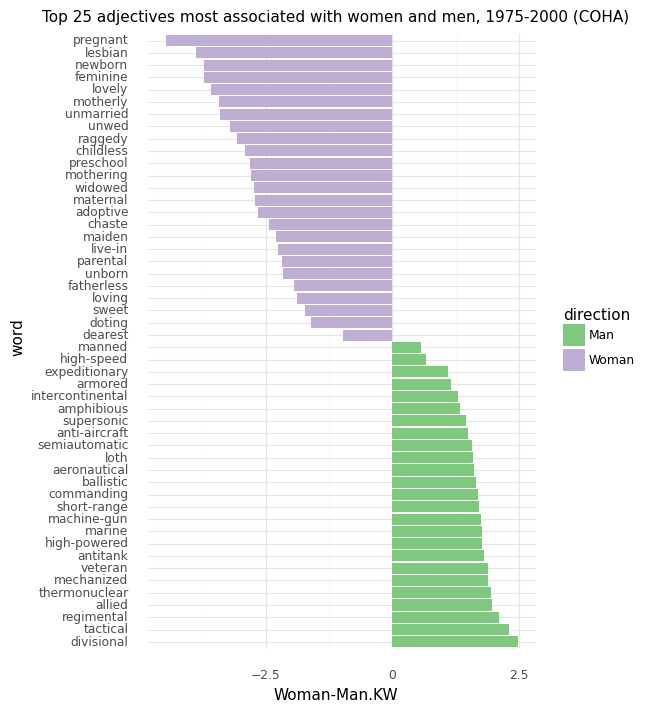

<ggplot: (673049399)>

In [3]:
df_contemp = df.query('period=="1975-2000"')
df_contemp_j = df_contemp.query('pos=="j"')
df_contemp_n = df_contemp.query('pos=="n"')
df_contemp_v = df_contemp.query('pos=="v"')

v=plot_extremes(df_contemp_v, title='Top 25 verbs most associated with women and men, 1975-2000 (COHA)')
n=plot_extremes(df_contemp_n, title='Top 25 nouns most associated with women and men, 1975-2000 (COHA)')
j=plot_extremes(df_contemp_j, title='Top 25 adjectives most associated with women and men, 1975-2000 (COHA)')
w=plot_extremes(df_contemp, title='Top 25 words most associated with women and men, 1975-2000 (COHA)')
j

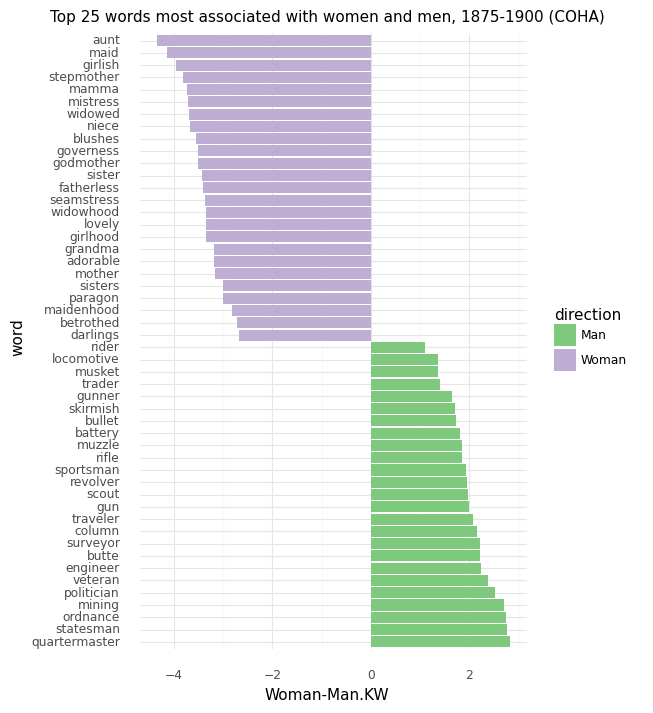

<ggplot: (679269298)>

In [4]:
df_old = df.query('period=="1875-1900"')
df_old_j = df_old.query('pos=="j"')
df_old_n = df_old.query('pos=="n"')
df_old_v = df_old.query('pos=="v"')

plot_extremes(df_old_v, title='Top 25 verbs most associated with women and men, 1875-1900 (COHA)')
plot_extremes(df_old_n, title='Top 25 nouns most associated with women and men, 1875-1900 (COHA)')
plot_extremes(df_old_j, title='Top 25 adjectives most associated with women and men, 1875-1900 (COHA)')
plot_extremes(df_old, title='Top 25 words most associated with women and men, 1875-1900 (COHA)')

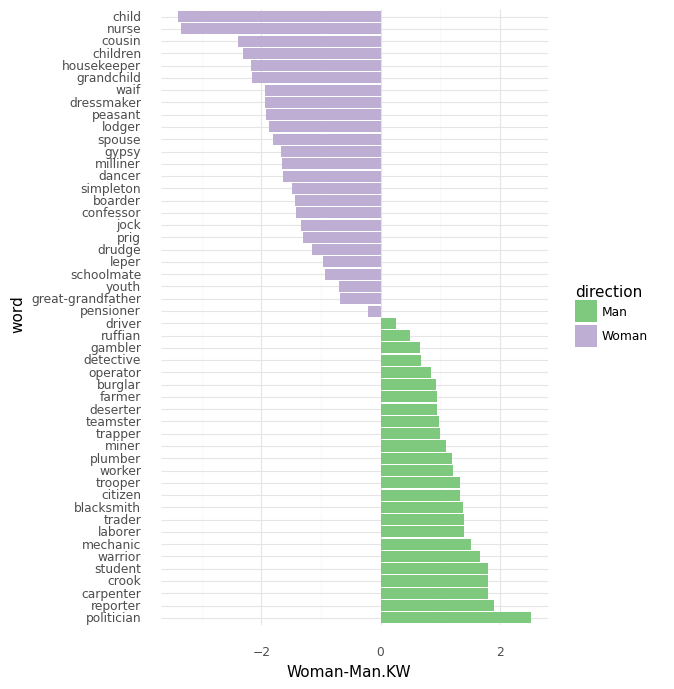

<ggplot: (363687241)>

In [5]:
fields = get_fields()
ppl_words = set(fields['VG.Human']) - set(fields['VG.Human.Male']) - set(fields['VG.Human.Female'])
df_ppl = df[df.word.isin(ppl_words)]
df_ppl_contemp = df_ppl[df_ppl.period=='1975-2000']
df_ppl_old = df_ppl[df_ppl.period=='1875-1900']

# plot_extremes(df_ppl_contemp)
plot_extremes(df_ppl_old)

## History

In [6]:
# Find changing words

dfch = load_bias_data(avg_runs=False)
dfch = dfch[dfch.num_models==dfch.num_models.max()].sort_values(['word','period'])
dfch_words=measure_changing_words(dfch)

Mapping measure_change [x8]: 100%|██████████| 14109/14109 [00:03<00:00, 4591.46it/s]


In [7]:
# Flipped strongly from male to female
dfch_words.query('start>1 & end<-1')

r2     n             p     slope       min       max  \
word                                                                       
pregnant      0.425397  70.0  7.191590e-10 -0.000902 -5.096402  1.474648   
surveys       0.409056  70.0  1.927320e-09  0.000478 -1.934621  2.789710   
transmitted   0.366967  70.0  2.176925e-08  0.000418 -1.653432  2.419716   
directors     0.357096  70.0  3.759949e-08  0.000378 -1.734639  2.441559   
suffrage      0.345089  70.0  7.233071e-08 -0.000525 -3.245400  1.744547   
students      0.342102  70.0  8.497096e-08  0.000373 -1.681791  2.295249   
workshop      0.325800  70.0  2.022156e-07  0.000292 -1.750702  1.750887   
disturbing    0.309342  70.0  4.759322e-07 -0.000291 -1.935269  1.605469   
sexual        0.287158  70.0  1.465778e-06 -0.000361 -2.201852  1.552307   
locality      0.276380  70.0  2.503339e-06  0.000280 -1.975636  1.858252   
aids          0.242696  70.0  1.275986e-05  0.000425 -2.839062  2.310006   
subscribers   0.236894  70.0  1.678582e-05  0.000286 -1.753401  1.907317   
enlarged      0.231979  70.0  2.114679e-05  0.000315 -1.901894  2.212753   
surgical      0.220251  70.0  3.651064e-05  0.000264 -1.710502  1.708357   
deficiency    0.185273  70.0  1.791568e-04  0.000231 -1.675014  1.584672   
promiscuous   0.137693  70.0  1.443766e-03 -0.000246 -2.868975  1.827251   
directory     0.137278  70.0  1.469823e-03  0.000251 -2.037815  2.616354   
organism      0.133074  70.0  1.761328e-03  0.000192 -1.343145  2.302923   
concentric    0.122283  70.0  2.796845e-03  0.000175 -1.960210  1.523676   
distinct      0.099256  70.0  7.449635e-03  0.000142 -2.106262  1.759505   
certificate   0.092456  70.0  9.937836e-03 -0.000171 -2.699805  1.479416   
appendix      0.091989  70.0  1.013643e-02  0.000143 -2.098661  1.394767   
dates         0.091433  70.0  1.037810e-02  0.000153 -1.579615  2.141086   
disabilities  0.086519  70.0  1.278046e-02  0.000136 -1.543035  1.615335   
organs        0.085768  70.0  1.319348e-02  0.000149 -1.982312  1.577473   
positive      0.079867  70.0  1.694366e-02  0.000130 -2.246882  1.386474   
body          0.079008  70.0  1.757237e-02  0.000175 -1.885019  2.624470   
needing       0.068786  70.0  2.713664e-02 -0.000108 -1.715345  1.344230   
reproduction  0.061041  70.0  3.778499e-02 -0.000128 -1.750451  1.899784   
stamps        0.057104  70.0  4.475135e-02  0.000116 -1.649698  1.756678   
cashier       0.056151  70.0  4.662786e-02  0.000139 -2.209190  1.691328   

                  magn     start       end    change flipped  
word                                                          
pregnant      6.571050  1.021198 -4.466344 -5.487542       F  
surveys       4.724331  1.070980 -1.235086 -2.306066       F  
transmitted   4.073148  1.817210 -1.146560 -2.963770       F  
directors     4.176198  1.443726 -1.084106 -2.527833       F  
suffrage      4.989947  1.399206 -1.645384 -3.044590       F  
students      3.977040  1.937452 -1.024948 -2.962401       F  
workshop      3.501589  1.307427 -1.122798 -2.430225       F  
disturbing    3.540739  1.152357 -1.033217 -2.185574       F  
sexual        3.754160  1.289470 -1.896934 -3.186404       F  
locality      3.833888  1.060823 -1.084801 -2.145624       F  
aids          5.149068  1.617648 -2.383460 -4.001108       F  
subscribers   3.660719  1.603851 -1.313613 -2.917465       F  
enlarged      4.114647  2.019158 -1.437638 -3.456795       F  
surgical      3.418859  1.205644 -1.136272 -2.341916       F  
deficiency    3.259686  1.004041 -1.002095 -2.006136       F  
promiscuous   4.696226  1.092226 -1.891701 -2.983927       F  
directory     4.654169  1.560561 -1.626920 -3.187481       F  
organism      3.646068  2.042127 -1.016700 -3.058827       F  
concentric    3.483887  1.094553 -1.318377 -2.412930       F  
distinct      3.865767  1.323417 -1.240721 -2.564138       F  
certificate   4.179221  1.184212 -1.804920 -2.989132       F  
appendix      3.493429  1.194252 -1.231019 -2.425271       F  

In [41]:
# Flipped strongly from female to male
dfch_words.query('start<-.5 & end>1').head(50)

r2     n             p     slope       min       max  \
word                                                                       
pipe          0.634962  70.0  9.478984e-17  0.000677 -1.014124  2.831262   
admiral       0.618546  70.0  4.378418e-16  0.000600 -1.089689  2.603474   
fired         0.605302  70.0  1.436159e-15  0.000579 -0.792660  2.818101   
tackle        0.594093  70.0  3.807643e-15  0.000632 -0.942896  2.877756   
commandant    0.591645  70.0  4.694382e-15  0.000522 -0.969133  2.439341   
boss          0.550575  70.0  1.325409e-13  0.000510 -1.407726  2.505393   
dame          0.548197  70.0  1.593404e-13 -0.000894 -3.664443  1.786760   
runner        0.532931  70.0  5.082076e-13  0.000431 -0.989385  2.136018   
hog           0.531997  70.0  5.449217e-13  0.000457 -0.953103  2.568626   
growled       0.527027  70.0  7.880185e-13  0.000466 -0.944202  2.388654   
racing        0.518827  70.0  1.436510e-12  0.000349 -0.876902  1.861205   
hounds        0.513465  70.0  2.115876e-12  0.000435 -0.960412  2.261641   
keen          0.506690  70.0  3.431249e-12  0.000341 -0.738772  1.908190   
pitching      0.499568  70.0  5.663830e-12  0.000568 -1.306287  3.184236   
relentless    0.497289  70.0  6.639685e-12  0.000394 -1.411269  2.355280   
rigged        0.445091  70.0  2.113678e-10  0.000398 -1.002813  2.271388   
rivals        0.438003  70.0  3.299951e-10  0.000423 -0.952434  2.443529   
duel          0.433214  70.0  4.445119e-10  0.000405 -1.015605  2.620277   
captured      0.411556  70.0  1.660382e-09  0.000326 -1.068885  2.245601   
luck          0.394267  70.0  4.600333e-09  0.000292 -0.856091  1.846716   
prize         0.387730  70.0  6.714731e-09  0.000291 -0.980222  1.863602   
dogged        0.382542  70.0  9.040000e-09  0.000383 -1.188005  2.597849   
pirates       0.370898  70.0  1.747262e-08  0.000333 -1.038494  2.495473   
replacing     0.364621  70.0  2.480620e-08  0.000396 -1.510259  2.479902   
helm          0.362339  70.0  2.815438e-08  0.000297 -0.984396  1.954753   
big           0.358286  70.0  3.521656e-08  0.000334 -1.163342  2.194110   
chips         0.351610  70.0  5.077167e-08  0.000303 -1.198014  1.784633   
conspirators  0.351573  70.0  5.087277e-08  0.000264 -0.882096  1.919828   
ace           0.331284  70.0  1.513868e-07  0.000389 -1.048752  3.556875   
wins          0.328763  70.0  1.729845e-07  0.000343 -1.427537  2.351571   
dumb          0.326032  70.0  1.997564e-07 -0.000290 -1.695027  1.751781   
cursed        0.319429  70.0  2.822930e-07  0.000229 -0.807440  1.710070   
bait          0.319377  70.0  2.830504e-07  0.000271 -1.312331  1.805184   
fist          0.317052  70.0  3.194700e-07  0.000218 -0.689066  2.078437   
buck          0.297783  70.0  8.587174e-07  0.000321 -0.944359  2.788686   
famed         0.293711  70.0  1.054931e-06  0.000235 -0.966654  1.959176   
fared         0.281198  70.0  1.972403e-06  0.000247 -1.434589  1.659561   
deadly        0.277479  70.0  2.371200e-06  0.000247 -1.130321  2.164142   
admirer       0.273723  70.0  2.853341e-06 -0.000301 -1.884195  1.530382   
steers        0.270346  70.0  3.367508e-06  0.000287 -1.427138  2.000707   
grizzly       0.265368  70.0  4.294010e-06  0.000270 -0.905573  2.344391   
rival         0.259721  70.0  5.647158e-06  0.000286 -1.531408  2.006439   
eagle         0.255502  70.0  6.921574e-06  0.000189 -1.075245  2.025276   
knights       0.254717  70.0  7.187895e-06  0.000175 -0.925921  1.583895   
probe         0.253368  70.0  7.669295e-06  0.000265 -1.089116  2.305450   
punch         0.249965  70.0  9.026993e-06  0.000245 -1.425844  2.337265   
sports        0.244169  70.0  1.189825e-05  0.000226 -1.153701  1.970717   
rowing        0.244028  70.0  1.197817e-05  0.000201 -1.133810  1.890300   
comrade       0.242659  70.0  1.278235e-05  0.000222 -0.908966  2.415304   
sport         0.236021  70.0  1.749007e-05  0.000250 -0.922845  2.470113   

                  magn     start       end    change flipped  
word

In [ ]:
', '.join(set(wn.index) - set(mn.index))

NameError: name 'wn' is not defined

In [9]:
# Fell strongly into female
dfch_words.query('end<0').sort_values('change').head(25)

r2     n             p     slope       min       max  \
word                                                                      
pregnant     0.425397  70.0  7.191590e-10 -0.000902 -5.096402  1.474648   
breasts      0.687708  70.0  4.186296e-19 -0.001039 -4.385187  0.548689   
aids         0.242696  70.0  1.275986e-05  0.000425 -2.839062  2.310006   
enlarged     0.231979  70.0  2.114679e-05  0.000315 -1.901894  2.212753   
directory    0.137278  70.0  1.469823e-03  0.000251 -2.037815  2.616354   
sexual       0.287158  70.0  1.465778e-06 -0.000361 -2.201852  1.552307   
births       0.213853  70.0  4.904251e-05 -0.000321 -3.136171  1.085432   
body         0.079008  70.0  1.757237e-02  0.000175 -1.885019  2.624470   
organism     0.133074  70.0  1.761328e-03  0.000192 -1.343145  2.302923   
suffrage     0.345089  70.0  7.233071e-08 -0.000525 -3.245400  1.744547   
community    0.371693  70.0  1.670976e-08  0.000368 -1.476605  2.535111   
anterior     0.348236  70.0  6.100010e-08  0.000406 -1.511654  2.598702   
men          0.735215  70.0  1.365810e-21  0.000915 -0.606001  3.132873   
agencies     0.609466  70.0  9.927890e-16  0.000638 -0.963683  2.780744   
certificate  0.092456  70.0  9.937836e-03 -0.000171 -2.699805  1.479416   
donor        0.146055  70.0  1.005907e-03 -0.000213 -2.971315  0.910658   
promiscuous  0.137693  70.0  1.443766e-03 -0.000246 -2.868975  1.827251   
sterile      0.106276  70.0  5.530518e-03 -0.000161 -2.498496  1.470494   
transmitted  0.366967  70.0  2.176925e-08  0.000418 -1.653432  2.419716   
students     0.342102  70.0  8.497096e-08  0.000373 -1.681791  2.295249   
accredited   0.523251  70.0  1.040335e-12  0.000580 -0.706170  2.911212   
adoption     0.200872  70.0  8.873025e-05 -0.000264 -2.699065  1.117233   
subscribers  0.236894  70.0  1.678582e-05  0.000286 -1.753401  1.907317   
nutrition    0.146454  70.0  9.886449e-04  0.000193 -1.661073  2.108150   
shapeless    0.265533  70.0  4.259533e-06 -0.000317 -3.155605  0.961753   

                 magn     start       end    change flipped  
word                                                         
pregnant     6.571050  1.021198 -4.466344 -5.487542       F  
breasts      4.933876  0.157259 -4.021879 -4.179138          
aids         5.149068  1.617648 -2.383460 -4.001108       F  
enlarged     4.114647  2.019158 -1.437638 -3.456795       F  
directory    4.654169  1.560561 -1.626920 -3.187481       F  
sexual       3.754160  1.289470 -1.896934 -3.186404       F  
births       4.221602  0.727603 -2.442099 -3.169703          
body         4.509489  2.096090 -1.051166 -3.147256       F  
organism     3.646068  2.042127 -1.016700 -3.058827       F  
suffrage     4.989947  1.399206 -1.645384 -3.044590       F  
community    4.011716  2.182445 -0.861902 -3.044347       F  
anterior     4.110356  2.358334 -0.673200 -3.031534       F  
men          3.738875  2.761836 -0.255114 -3.016949       F  
agencies     3.744427  2.589651 -0.410454 -3.000105       F  
certificate  4.179221  1.184212 -1.804920 -2.989132       F  
donor        3.881973  0.441553 -2.543592 -2.985145          
promiscuous  4.696226  1.092226 -1.891701 -2.983927       F  
sterile      3.968989  0.991977 -1.973764 -2.965742          
transmitted  4.073148  1.817210 -1.146560 -2.963770       F  
students     3.977040  1.937452 -1.024948 -2.962401       F  
accredited   3.617382  2.754752 -0.200492 -2.955243       F  
adoption     3.816298  0.786063 -2.159392 -2.945455          
subscribers  3.660719  1.603851 -1.313613 -2.917465       F  
nutrition    3.769223  1.900910 -0.959804 -2.860714       F  
shapeless    4.117359  0.699148 -2.154355 -2.853503

In [54]:
# Fell strongly into male
dfch_words['start_abs']=dfch_words['start'].apply(abs)
dfch_words['end_abs']=dfch_words['end'].apply(abs)
dfch_words

r2     n             p     slope       min       max  \
word                                                                         
sister          0.993837  70.0  5.386118e-78 -0.001705 -3.922716 -2.742893   
lady            0.993400  70.0  5.718573e-77 -0.001629 -3.527995 -2.457923   
mother          0.992884  70.0  7.663013e-76 -0.001682 -3.859174 -2.711293   
shawl           0.992838  70.0  9.585790e-76 -0.001649 -3.705530 -2.597058   
baby            0.992492  70.0  4.885595e-75 -0.001868 -4.212849 -2.772341   
...                  ...   ...           ...       ...       ...       ...   
peremptory      0.054830  70.0  4.936144e-02 -0.000094 -2.229103  1.245036   
bonfire         0.054741  70.0  4.955221e-02  0.000081 -1.400203  1.461827   
woes            0.054732  70.0  4.957102e-02 -0.000113 -1.353249  2.122806   
recalls         0.054716  70.0  4.960597e-02  0.000084 -1.162174  1.831775   
unsatisfactory  0.054608  70.0  4.983799e-02  0.000084 -1.110269  1.744534   

                    magn     start       end    change flipped  start_abs  \
word                                                                        
sister          1.179823 -3.307607 -3.019261  0.288346           3.307607   
lady            1.070072 -3.260563 -2.885944  0.374619           3.260563   
mother          1.147881 -3.123109 -3.056515  0.066594           3.123109   
shawl           1.108472 -3.031191 -3.070349 -0.039158           3.031191   
baby            1.440508 -3.249423 -3.925445 -0.676022           3.249423   
...                  ...       ...       ...       ...     ...        ...   
peremptory      3.474139  0.379038 -0.536185 -0.915223           0.379038   
bonfire         2.862030  0.405897 -0.719477 -1.125374           0.405897   
woes            3.476055 -0.760766  1.288902  2.049668           0.760766   
recalls         2.993949 -0.512581  0.656481  1.169062           0.512581   
unsatisfactory  2.854803  1.284795 -0.311611 -1.596406       F   1.284795   

                 end_abs  
word                      
sister          3.019261  
lady            2.885944  
mother          3.056515  
shawl           3.070349  
baby            3.925445  
...                  ...  
peremptory      0.536185  
bonfire         0.719477  
woes            1.288902  
recalls         0.656481  
unsatisfactory  0.311611  

[12312 rows x 13 columns]

In [77]:
dfch_words.query('start>1 & end_abs<.25').head(25)

r2     n             p     slope       min       max  \
word                                                                      
data         0.851917  70.0  2.495493e-30  0.000763 -0.275909  2.484345   
continue     0.845409  70.0  1.104474e-29  0.000587 -0.141804  1.919949   
represent    0.819376  70.0  2.407611e-27  0.000683 -0.744003  2.177226   
statement    0.818578  70.0  2.804500e-27  0.000544 -0.640596  1.833980   
limited      0.818325  70.0  2.943396e-27  0.000691 -0.333548  2.210335   
is           0.812565  70.0  8.668283e-27  0.000700 -0.513047  2.294282   
issues       0.811967  70.0  9.679808e-27  0.000871 -0.298429  2.924307   
pioneer      0.810664  70.0  1.229321e-26  0.000656 -0.646735  2.087743   
region       0.808859  70.0  1.707169e-26  0.000499 -0.437821  1.582822   
issue        0.808343  70.0  1.874142e-26  0.000569 -0.505507  1.899979   
originate    0.806999  70.0  2.387215e-26  0.000579 -0.293346  1.985588   
assessment   0.806761  70.0  2.491228e-26  0.000528 -0.419609  1.946397   
altitude     0.805356  70.0  3.201363e-26  0.000441 -0.250138  1.747151   
exist        0.805301  70.0  3.232476e-26  0.000551 -0.017425  2.036776   
lesser       0.800905  70.0  7.001795e-26  0.000548 -0.282570  1.866636   
charts       0.795221  70.0  1.855737e-25  0.000630 -0.558796  2.370009   
aggregate    0.794659  70.0  2.040197e-25  0.000628 -0.596587  1.998939   
stock        0.794489  70.0  2.099684e-25  0.000588 -0.617407  2.351047   
subdivision  0.793642  70.0  2.420992e-25  0.000636 -0.974996  2.131997   
capacities   0.793448  70.0  2.500853e-25  0.000546 -0.250979  2.031550   
erected      0.792975  70.0  2.707135e-25  0.000431 -0.463703  1.586690   
official     0.791528  70.0  3.445828e-25  0.000823 -0.479883  2.906321   
point        0.791347  70.0  3.550666e-25  0.000486 -0.486967  1.740072   
outlay       0.788008  70.0  6.152342e-25  0.000483  0.003591  1.910024   
railways     0.787959  70.0  6.202482e-25  0.000582 -0.266442  2.015836   

                 magn     start       end    change flipped  start_abs  \
word                                                                     
data         2.760254  1.963143  0.239000 -1.724142           1.963143   
continue     2.061753  1.261902  0.247605 -1.014297           1.261902   
represent    2.921229  1.245888  0.165612 -1.080276           1.245888   
statement    2.474576  1.205460  0.229983 -0.975477           1.205460   
limited      2.543883  1.856869  0.245481 -1.611388           1.856869   
is           2.807329  1.609877  0.069623 -1.540254           1.609877   
issues       3.222736  2.436832  0.236472 -2.200360           2.436832   
pioneer      2.734478  1.048926  0.196600 -0.852326           1.048926   
region       2.020642  1.108065  0.111172 -0.996893           1.108065   
issue        2.405486  1.211441  0.191732 -1.019710           1.211441   
originate    2.278934  1.529352  0.248460 -1.280892           1.529352   
assessment   2.366006  1.497068  0.217262 -1.279806           1.497068   
altitude     1.997289  1.000462  0.232128 -0.768334           1.000462   
exist        2.054201  1.785859  0.242615 -1.543244           1.785859   
lesser       2.149206  1.327069  0.197142 -1.129927           1.327069   
charts       2.928805  1.530315  0.150717 -1.379598           1.530315   
aggregate    2.595527  1.585188 -0.002649 -1.587838       F   1.585188   
stock        2.968454  1.366749  0.246925 -1.119823           1.366749   
subdivision  3.106992  1.778438  0.113792 -1.664646           1.778438   
capacities   2.282529  1.655641  0.249368 -1.406272           1.655641   
erected      2.050394  1.057198  0.154483 -0.902714           1.057198   
official     3.386204  2.096925  0.227359 -1.869566           2.096925   
point        2.227039  1.134564  0.210047 -0.924516           1.134564   
outlay       1.906433  1.244927  0.216188 -1.028739           1.244927   
railways     2.282278  1.703661  0.237384 -1.466277           1.70366

In [78]:
dfch_words.query('start_abs>.5 & end_abs<.1').head(25)

r2     n             p     slope       min       max  \
word                                                                    
is         0.812565  70.0  8.668283e-27  0.000700 -0.513047  2.294282   
loves      0.802444  70.0  5.352790e-26 -0.000496 -1.674674  0.808730   
aggregate  0.794659  70.0  2.040197e-25  0.000628 -0.596587  1.998939   
activity   0.785178  70.0  9.739798e-25  0.000698 -0.917091  2.305946   
product    0.780345  70.0  2.104402e-24  0.000571 -0.632696  2.021137   
determine  0.780027  70.0  2.212657e-24  0.000626 -0.483783  2.452899   
frock      0.779759  70.0  2.307973e-24 -0.000827 -2.910742  0.558295   
bless      0.778155  70.0  2.967444e-24 -0.000426 -1.519368  0.583802   
foremost   0.776261  70.0  3.983551e-24  0.000725 -0.760162  2.604461   
wretched   0.771849  70.0  7.834774e-24 -0.000551 -1.841292  0.801056   
companies  0.771786  70.0  7.910853e-24  0.000720 -0.448077  2.511970   
operates   0.771445  70.0  8.330864e-24  0.000631 -0.756014  2.259794   
outraged   0.768837  70.0  1.234117e-23 -0.000636 -2.895049  0.319194   
computed   0.767535  70.0  1.499302e-23  0.000520 -0.561351  1.894730   
poor       0.766102  70.0  1.855035e-23 -0.000694 -2.551846  0.557214   
various    0.765474  70.0  2.035822e-23  0.000513 -0.437576  1.726819   
charm      0.765086  70.0  2.155566e-23 -0.000564 -2.009135  0.588138   
broader    0.764722  70.0  2.274394e-23  0.000548 -0.549039  1.893119   
terror     0.764547  70.0  2.333848e-23 -0.000553 -2.011376  0.522876   
local      0.763678  70.0  2.651606e-23  0.000592 -0.347065  1.974097   
press      0.761870  70.0  3.453160e-23  0.000499 -0.827986  1.841087   
brat       0.760810  70.0  4.027343e-23 -0.000610 -2.103564  0.751048   
infested   0.759579  70.0  4.811242e-23  0.000393 -0.582805  1.857043   
branch     0.758481  70.0  5.634645e-23  0.000593 -0.498726  2.127178   
available  0.758175  70.0  5.887613e-23  0.000815 -0.442585  2.982881   

               magn     start       end    change flipped  start_abs   end_abs  
word                                                                            
is         2.807329  1.609877  0.069623 -1.540254           1.609877  0.069623  
loves      2.483404 -1.154499 -0.007715  1.146784       M   1.154499  0.007715  
aggregate  2.595527  1.585188 -0.002649 -1.587838       F   1.585188  0.002649  
activity   3.223036  1.912942 -0.013513 -1.926455       F   1.912942  0.013513  
product    2.653833  1.377109  0.083471 -1.293638           1.377109  0.083471  
determine  2.936681  1.242347  0.033029 -1.209317       F   1.242347  0.033029  
frock      3.469037 -1.042285 -0.033904  1.008382       M   1.042285  0.033904  
bless      2.103170 -1.032519 -0.011033  1.021487       M   1.032519  0.011033  
foremost   3.364622  0.926161  0.013959 -0.912202           0.926161  0.013959  
wretched   2.642347 -1.316884  0.000193  1.317078       M   1.316884  0.000193  
companies  2.960047  1.946509 -0.007444 -1.953953       F   1.946509  0.007444  
operates   3.015809  1.401713 -0.083254 -1.484968       F   1.401713  0.083254  
outraged   3.214243 -1.121298 -0.094134  1.027164           1.121298  0.094134  
computed   2.456081  1.411232 -0.054854 -1.466086       F   1.411232  0.054854  
poor       3.109060 -1.153834 -0.020569  1.133265       M   1.153834  0.020569  
various    2.164396  0.892041  0.047352 -0.844688           0.892041  0.047352  
charm      2.597273 -1.410656  0.046285  1.456941       M   1.410656  0.046285  
broader    2.442158  1.598529  0.076349 -1.522180           1.598529  0.076349  
terror     2.534252 -1.442167  0.044581  1.486748       M   1.442167  0.044581  
local      2.321163  1.673634  0.070679 -1.602955           1.673634  0.070679  
press      2.669073  1.132267 -0.012187 -1.144454       F   1.132267  0.012187  
brat       2.854613 -1.322724  0.083594  1.406318       M   1.322724  0.083594  
infested   2.439848  0.838588  0.092576 -0.746012           0.838588  0.092576  
branch     2.625905 

In [ ]:
# Flipped strongly from female to male
dfch_words.query('start<-1 & end>1')

r2     n             p     slope       min       max  \
word                                                                         
dame            0.548197  70.0  1.593404e-13 -0.000894 -3.664443  1.786760   
replacing       0.364621  70.0  2.480620e-08  0.000396 -1.510259  2.479902   
wins            0.328763  70.0  1.729845e-07  0.000343 -1.427537  2.351571   
fared           0.281198  70.0  1.972403e-06  0.000247 -1.434589  1.659561   
admirer         0.273723  70.0  2.853341e-06 -0.000301 -1.884195  1.530382   
steers          0.270346  70.0  3.367508e-06  0.000287 -1.427138  2.000707   
rival           0.259721  70.0  5.647158e-06  0.000286 -1.531408  2.006439   
punch           0.249965  70.0  9.026993e-06  0.000245 -1.425844  2.337265   
obsolete        0.227004  70.0  2.668153e-05  0.000357 -2.383765  2.606349   
ottoman         0.213143  70.0  5.066923e-05 -0.000275 -2.127923  1.969273   
won             0.201709  70.0  8.542059e-05  0.000216 -1.367696  1.746729   
hapless         0.185407  70.0  1.780923e-04 -0.000339 -2.695310  2.378592   
steals          0.170432  70.0  3.464214e-04 -0.000192 -1.349611  1.777641   
hitch           0.163732  70.0  4.652963e-04  0.000189 -1.458544  2.080677   
cap             0.161265  70.0  5.184678e-04 -0.000169 -1.246518  1.686662   
sire            0.157400  70.0  6.140110e-04 -0.000202 -2.141662  2.059880   
frank           0.116413  70.0  3.593121e-03  0.000200 -2.065688  2.136404   
razor           0.113129  70.0  4.132565e-03  0.000159 -1.748099  1.994977   
bobby           0.105626  70.0  5.685309e-03 -0.000248 -2.142983  2.618256   
vowed           0.097061  70.0  8.176104e-03 -0.000154 -1.639127  1.867494   
saxon           0.096767  70.0  8.278779e-03 -0.000175 -2.477005  1.868421   
throwing        0.096041  70.0  8.537181e-03 -0.000125 -1.439063  1.521019   
superb          0.095215  70.0  8.841607e-03 -0.000187 -2.102714  1.973461   
destroyer       0.084484  70.0  1.393145e-02  0.000174 -1.874712  2.165562   
fiddle          0.081349  70.0  1.591179e-02 -0.000139 -1.597744  2.137995   
brother-in-law  0.072612  70.0  2.305785e-02 -0.000108 -1.694521  1.515335   
enthusiast      0.065657  70.0  3.101281e-02  0.000113 -1.284370  1.665102   
fans            0.061803  70.0  3.657165e-02 -0.000141 -2.101120  1.731446   
reiterated      0.058762  70.0  4.166883e-02  0.000094 -1.446261  1.844958   

                    magn     start       end    change flipped  
word                                                            
dame            5.451203 -3.260609  1.192215  4.452824       M  
replacing       3.990161 -1.315458  1.607333  2.922791       M  
wins            3.779108 -1.066072  1.538226  2.604297       M  
fared           3.094150 -1.062714  1.054769  2.117482       M  
admirer         3.414578 -1.677872  1.005645  2.683518       M  
steers          3.427845 -1.268648  1.198395  2.467044       M  
rival           3.537847 -1.085639  1.394174  2.479813       M  
punch           3.763109 -1.116231  1.495558  2.611789       M  
obsolete        4.990113 -1.981267  1.711436  3.692704       M  
ottoman         4.097195 -1.406023  1.148723  2.554746       M  
won             3.114424 -1.171459  1.205508  2.376968       M  
hapless         5.073901 -2.479297  1.020937  3.500233       M  
steals          3.127252 -1.060781  1.207764  2.268545       M  
hitch           3.539221 -1.035121  1.303540  2.338662       M  
cap             2.933181 -1.102581  1.223560  2.326141       M  
sire            4.201542 -1.760418  1.170072  2.930490       M  
frank           4.202092 -1.650641  1.617127  3.267768       M  
razor           3.743076 -1.301250  1.284649  2.585899       M  
bobby           4.761238 -1.604601  1.991929  3.596530       M  
vowed           3.506620 -1.360260  1.208689  2.568949       M  
saxon           4.345426 -1.214800  1.446210  2.661010       M  
throwing        2.960081 -1.241318  1.039477  2.280795       M  
superb          4.076174 -1.821254  1.25489

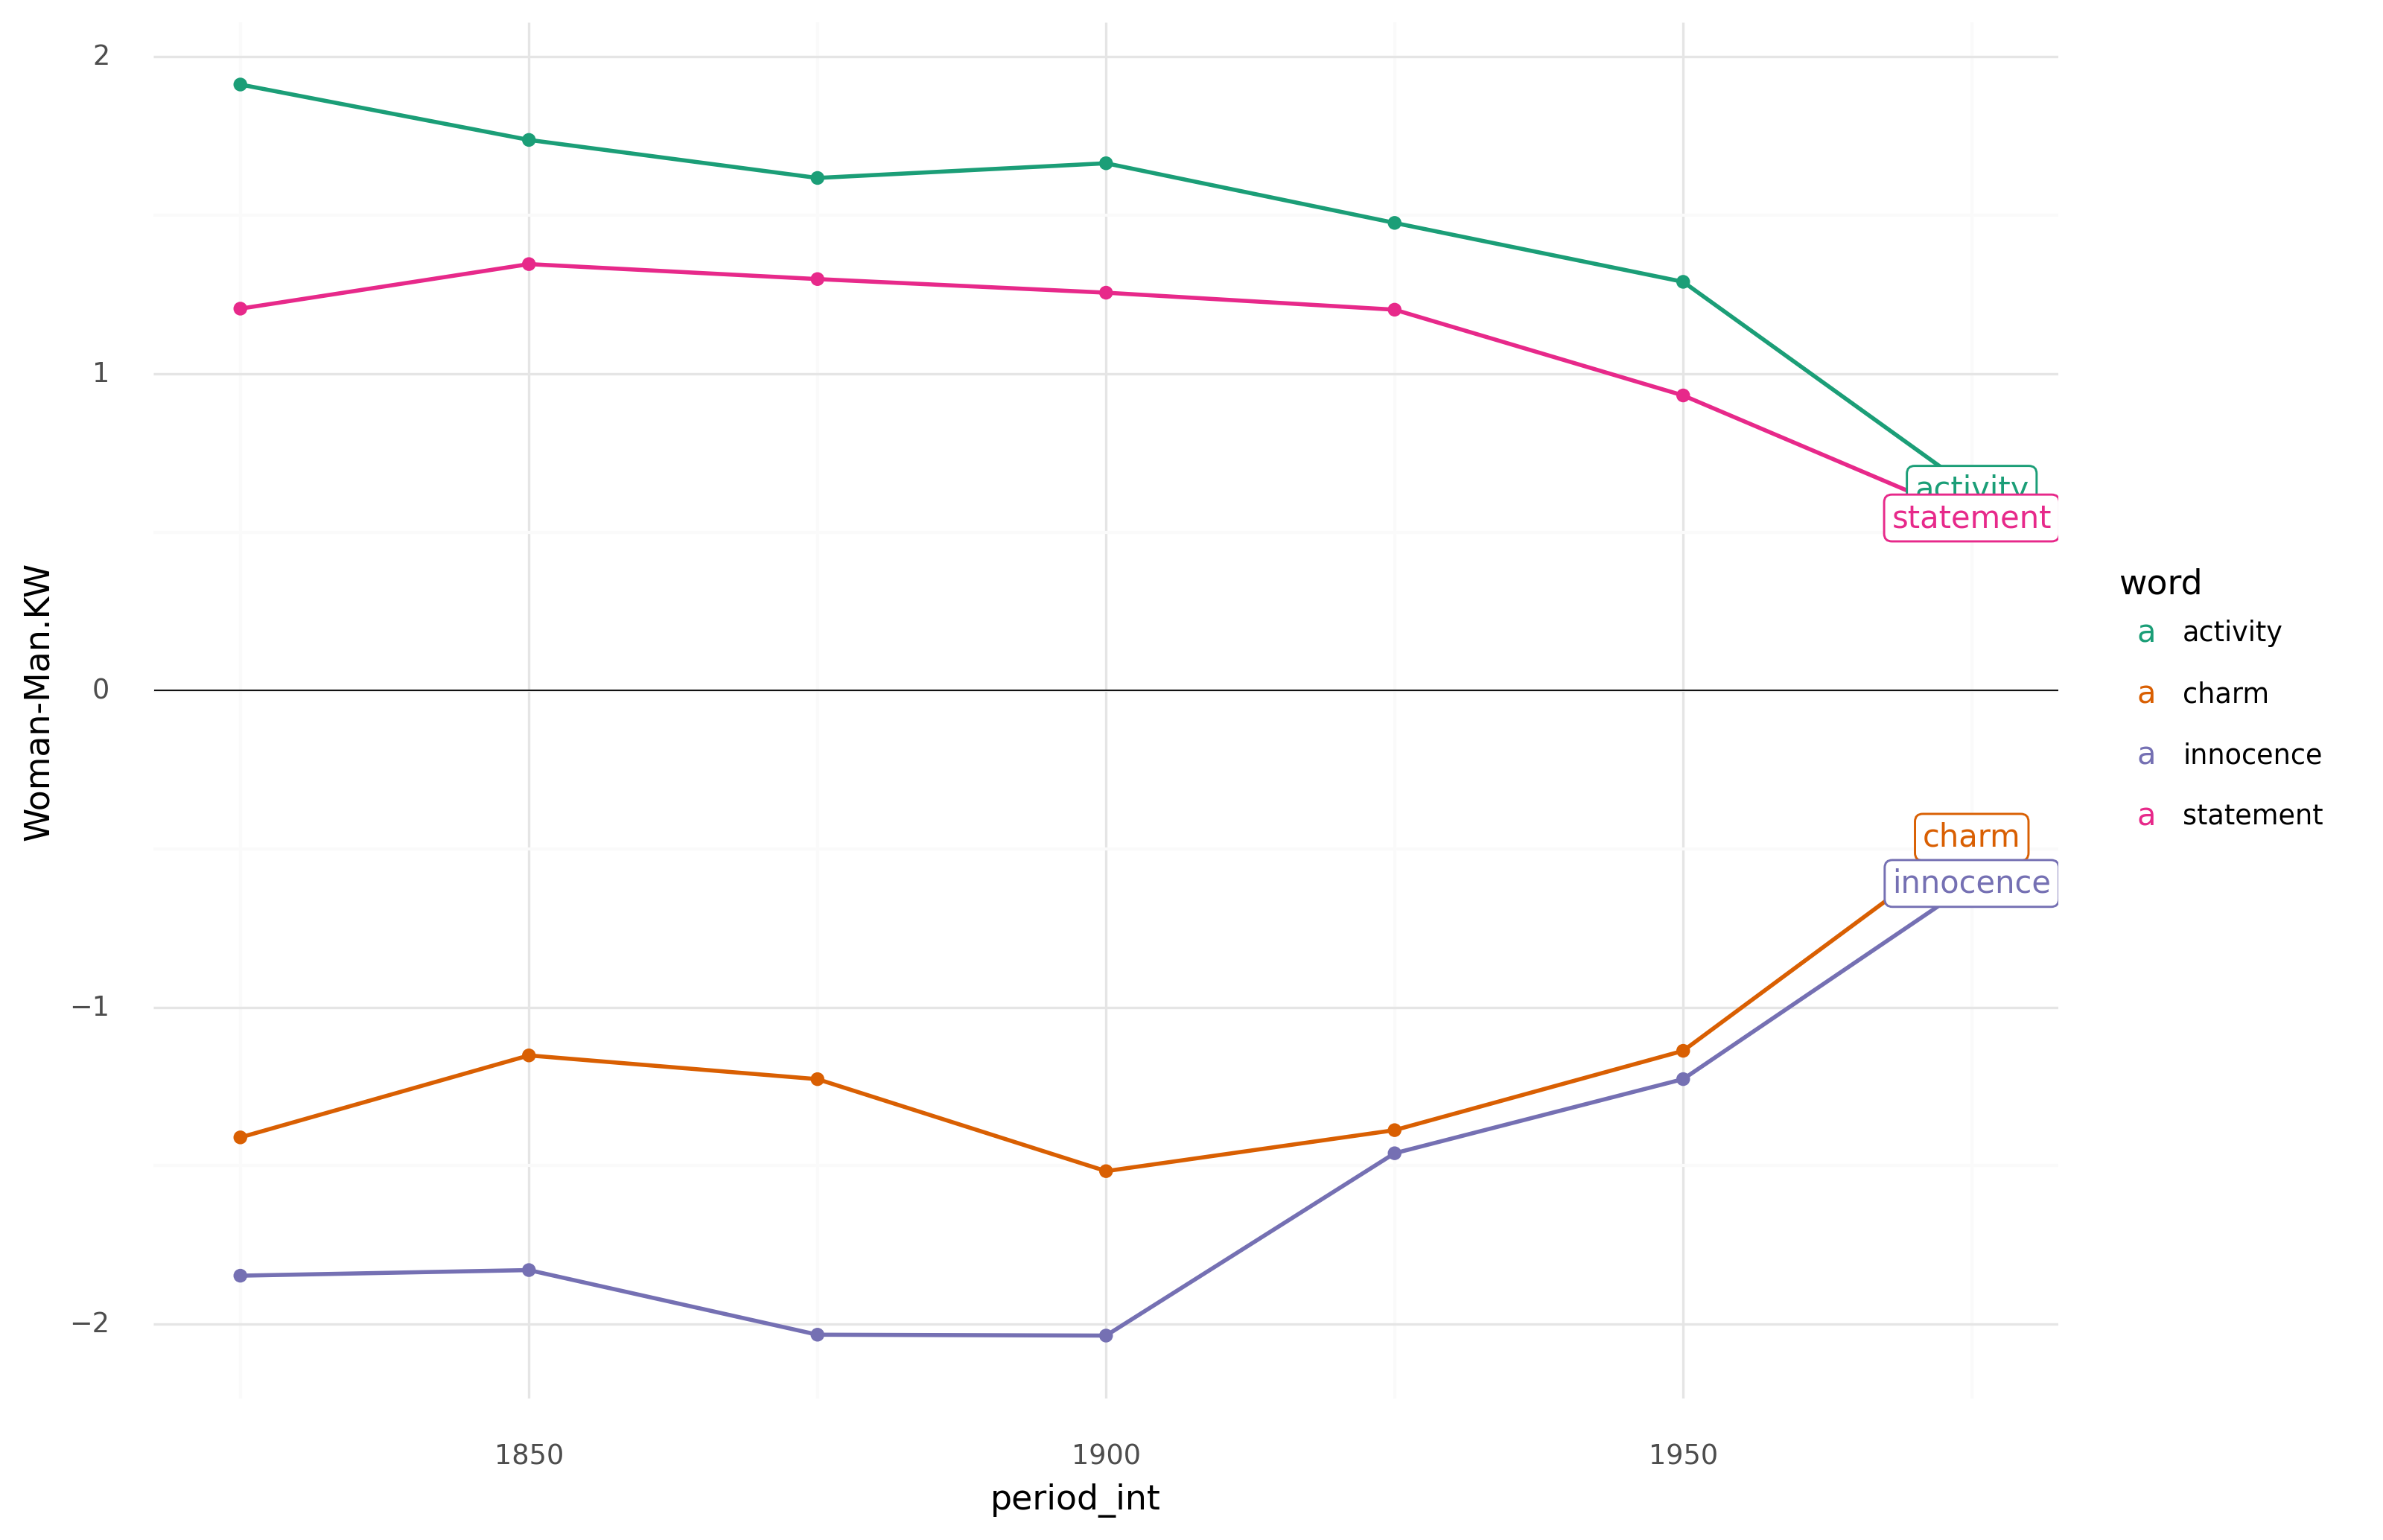

<ggplot: (674357667)>

In [80]:
plot_hist(df, ['innocence', 'charm', 'statement','activity'])

In [ ]:
# Flipped strongly from female to male
dfch_words.query('start<-1 & end>1')

r2     n             p     slope       min       max  \
word                                                                         
dame            0.548197  70.0  1.593404e-13 -0.000894 -3.664443  1.786760   
replacing       0.364621  70.0  2.480620e-08  0.000396 -1.510259  2.479902   
wins            0.328763  70.0  1.729845e-07  0.000343 -1.427537  2.351571   
fared           0.281198  70.0  1.972403e-06  0.000247 -1.434589  1.659561   
admirer         0.273723  70.0  2.853341e-06 -0.000301 -1.884195  1.530382   
steers          0.270346  70.0  3.367508e-06  0.000287 -1.427138  2.000707   
rival           0.259721  70.0  5.647158e-06  0.000286 -1.531408  2.006439   
punch           0.249965  70.0  9.026993e-06  0.000245 -1.425844  2.337265   
obsolete        0.227004  70.0  2.668153e-05  0.000357 -2.383765  2.606349   
ottoman         0.213143  70.0  5.066923e-05 -0.000275 -2.127923  1.969273   
won             0.201709  70.0  8.542059e-05  0.000216 -1.367696  1.746729   
hapless         0.185407  70.0  1.780923e-04 -0.000339 -2.695310  2.378592   
steals          0.170432  70.0  3.464214e-04 -0.000192 -1.349611  1.777641   
hitch           0.163732  70.0  4.652963e-04  0.000189 -1.458544  2.080677   
cap             0.161265  70.0  5.184678e-04 -0.000169 -1.246518  1.686662   
sire            0.157400  70.0  6.140110e-04 -0.000202 -2.141662  2.059880   
frank           0.116413  70.0  3.593121e-03  0.000200 -2.065688  2.136404   
razor           0.113129  70.0  4.132565e-03  0.000159 -1.748099  1.994977   
bobby           0.105626  70.0  5.685309e-03 -0.000248 -2.142983  2.618256   
vowed           0.097061  70.0  8.176104e-03 -0.000154 -1.639127  1.867494   
saxon           0.096767  70.0  8.278779e-03 -0.000175 -2.477005  1.868421   
throwing        0.096041  70.0  8.537181e-03 -0.000125 -1.439063  1.521019   
superb          0.095215  70.0  8.841607e-03 -0.000187 -2.102714  1.973461   
destroyer       0.084484  70.0  1.393145e-02  0.000174 -1.874712  2.165562   
fiddle          0.081349  70.0  1.591179e-02 -0.000139 -1.597744  2.137995   
brother-in-law  0.072612  70.0  2.305785e-02 -0.000108 -1.694521  1.515335   
enthusiast      0.065657  70.0  3.101281e-02  0.000113 -1.284370  1.665102   
fans            0.061803  70.0  3.657165e-02 -0.000141 -2.101120  1.731446   
reiterated      0.058762  70.0  4.166883e-02  0.000094 -1.446261  1.844958   

                    magn     start       end    change flipped  
word                                                            
dame            5.451203 -3.260609  1.192215  4.452824       M  
replacing       3.990161 -1.315458  1.607333  2.922791       M  
wins            3.779108 -1.066072  1.538226  2.604297       M  
fared           3.094150 -1.062714  1.054769  2.117482       M  
admirer         3.414578 -1.677872  1.005645  2.683518       M  
steers          3.427845 -1.268648  1.198395  2.467044       M  
rival           3.537847 -1.085639  1.394174  2.479813       M  
punch           3.763109 -1.116231  1.495558  2.611789       M  
obsolete        4.990113 -1.981267  1.711436  3.692704       M  
ottoman         4.097195 -1.406023  1.148723  2.554746       M  
won             3.114424 -1.171459  1.205508  2.376968       M  
hapless         5.073901 -2.479297  1.020937  3.500233       M  
steals          3.127252 -1.060781  1.207764  2.268545       M  
hitch           3.539221 -1.035121  1.303540  2.338662       M  
cap             2.933181 -1.102581  1.223560  2.326141       M  
sire            4.201542 -1.760418  1.170072  2.930490       M  
frank           4.202092 -1.650641  1.617127  3.267768       M  
razor           3.743076 -1.301250  1.284649  2.585899       M  
bobby           4.761238 -1.604601  1.991929  3.596530       M  
vowed           3.506620 -1.360260  1.208689  2.568949       M  
saxon           4.345426 -1.214800  1.446210  2.661010       M  
throwing        2.960081 -1.241318  1.039477  2.280795       M  
superb          4.076174 -1.821254  1.25489

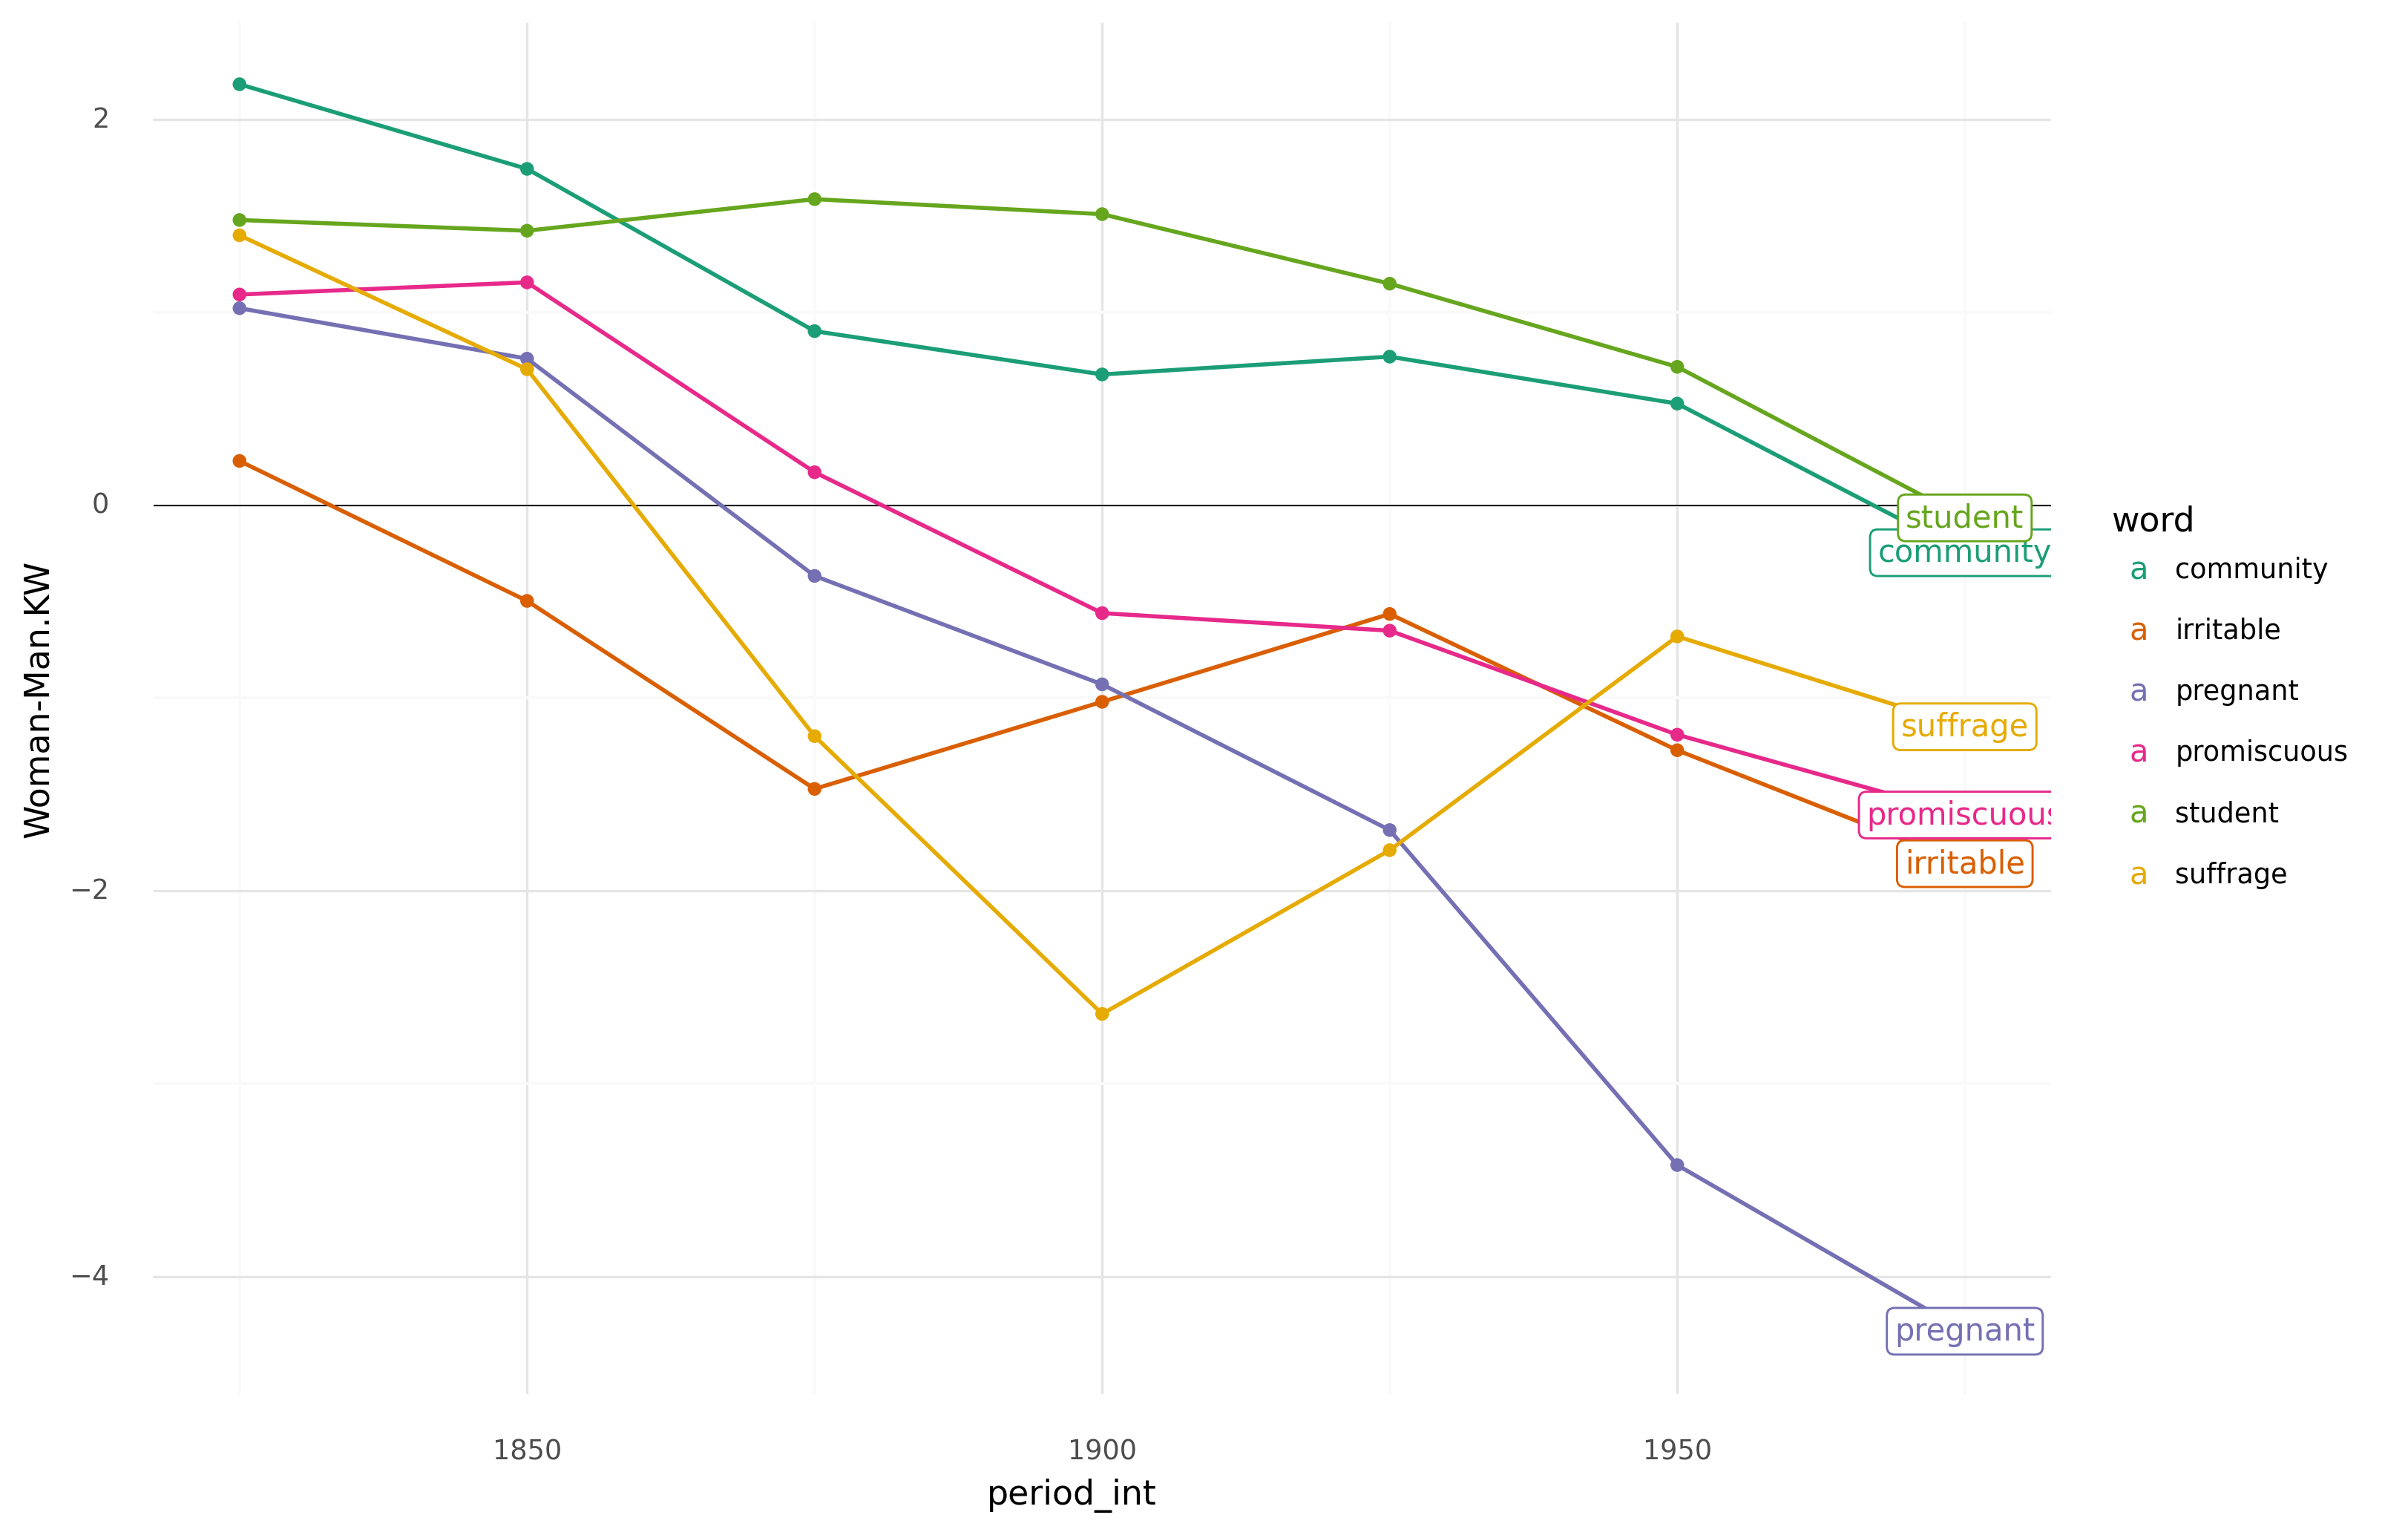

<ggplot: (676834482)>

In [31]:
plot_hist(df, ['student','pregnant','irritable','promiscuous','community', 'suffrage'])

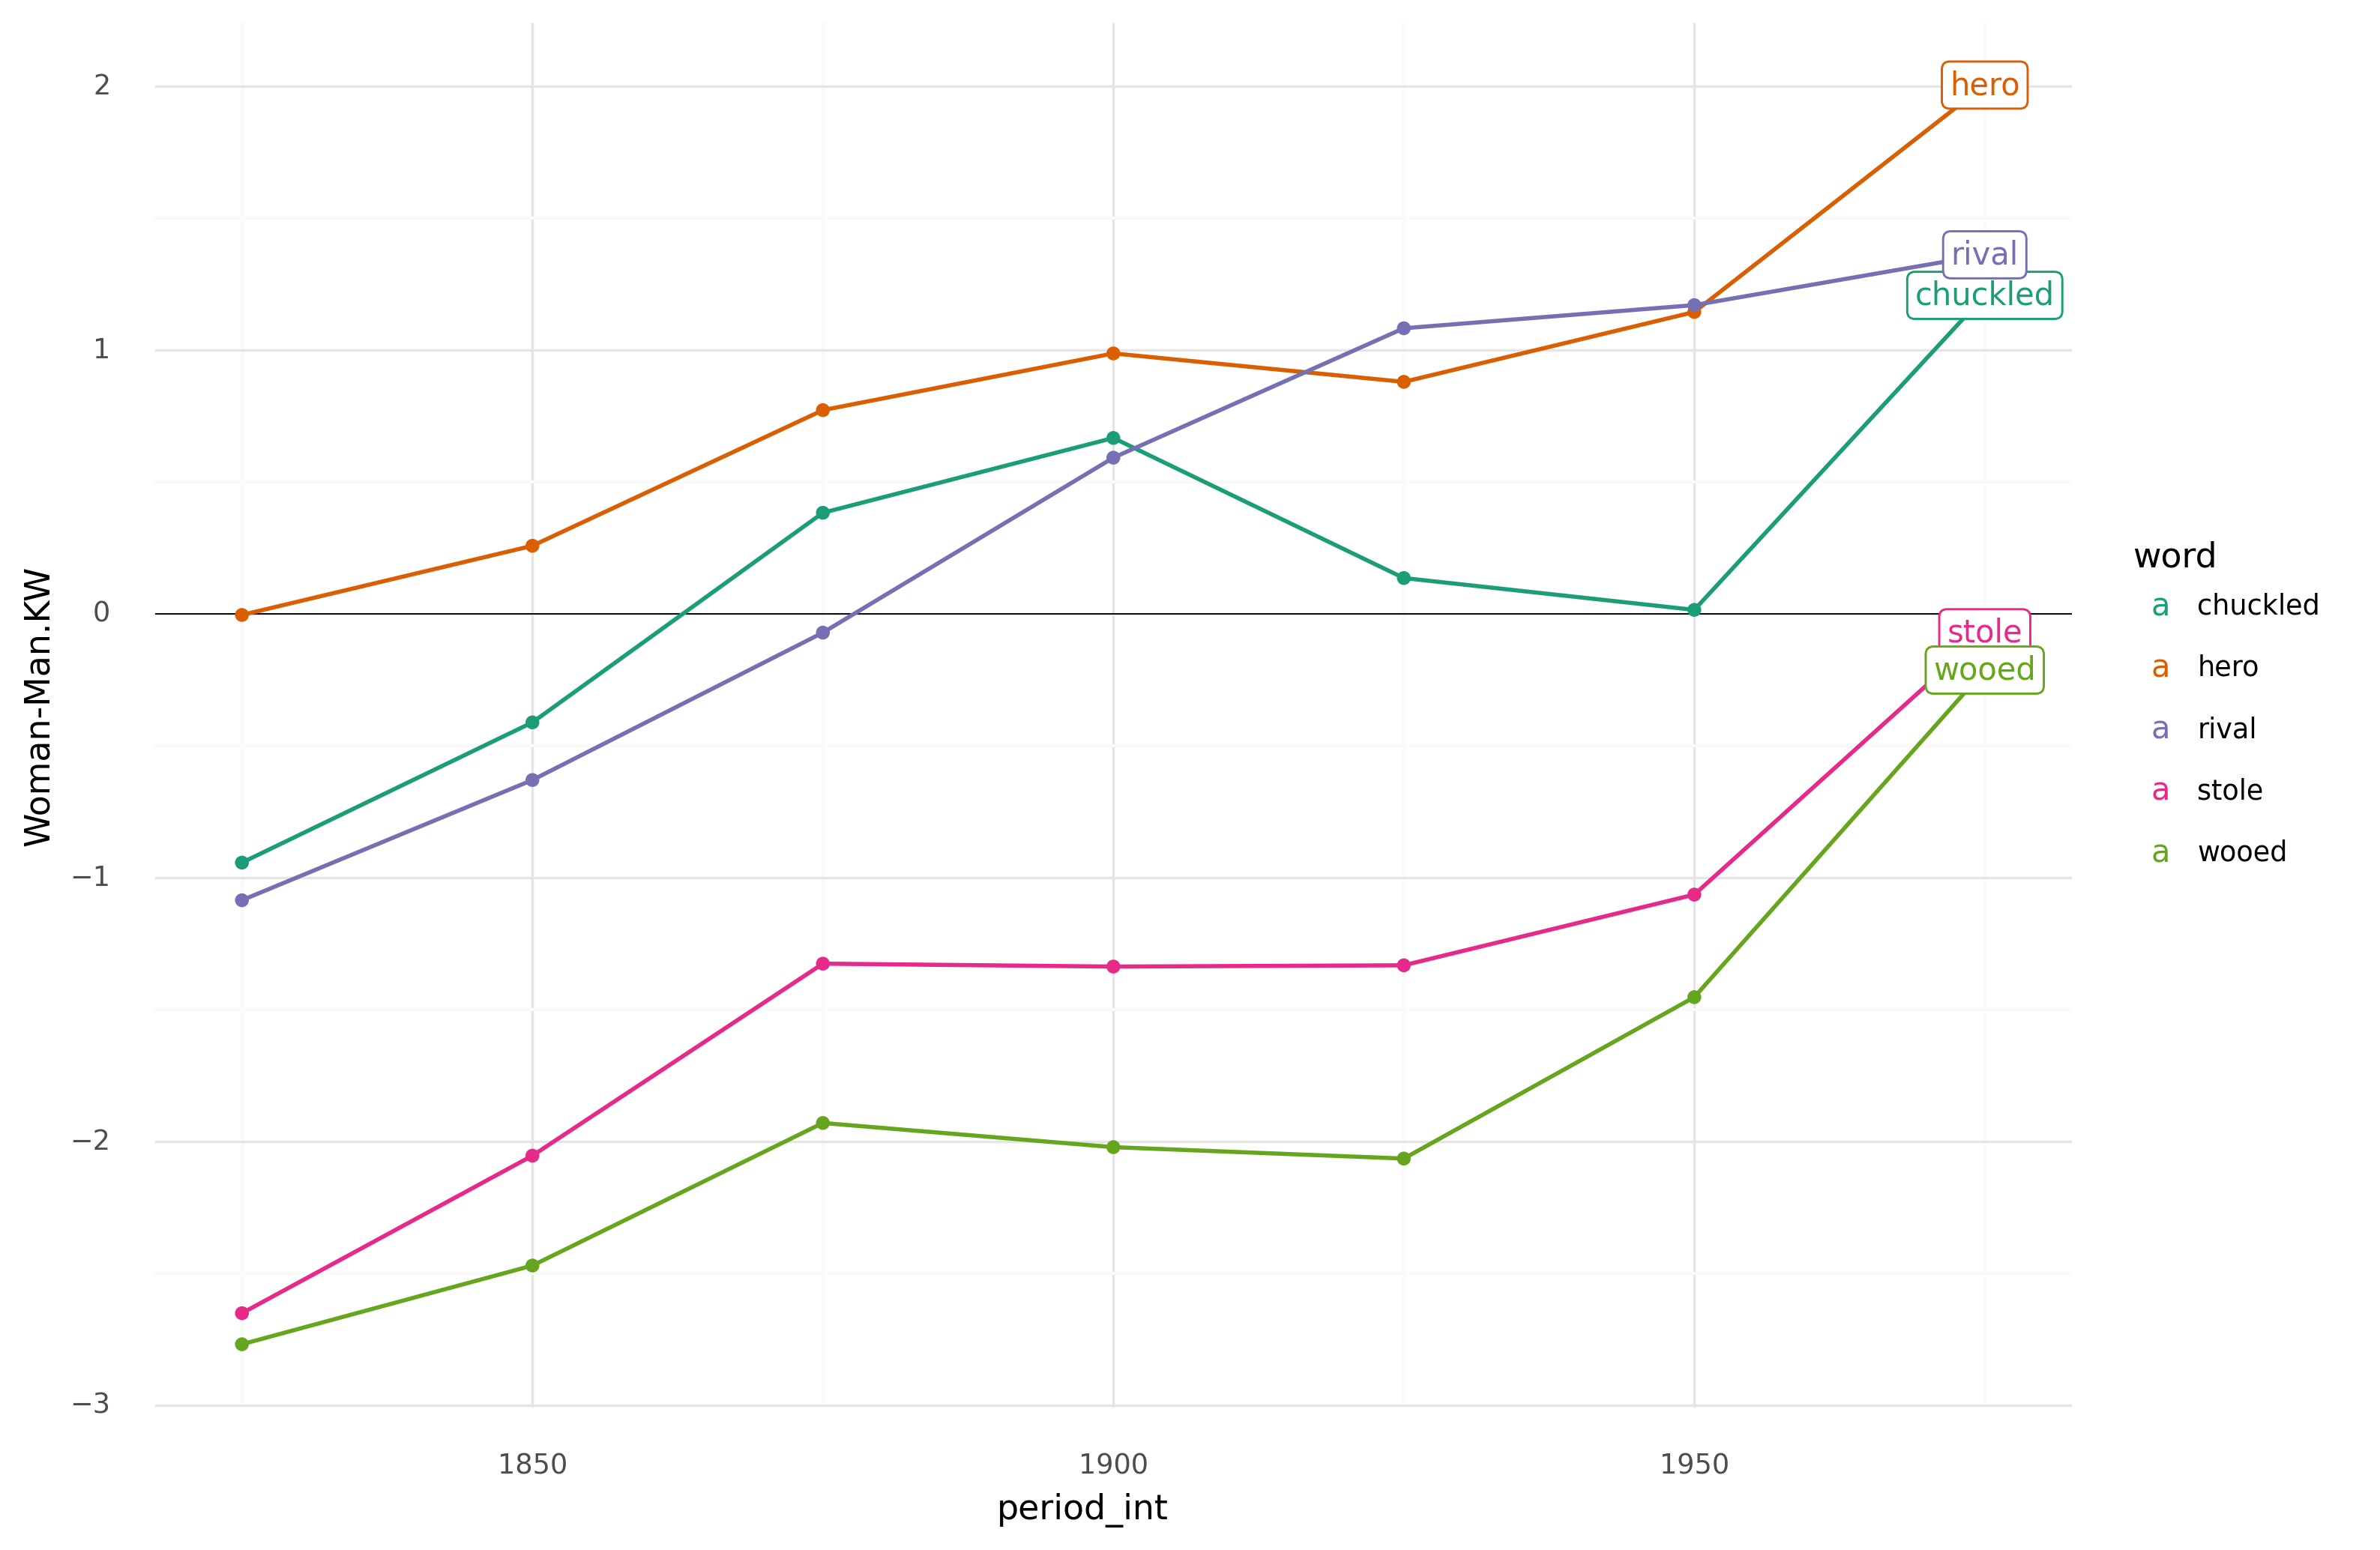

<ggplot: (682599891)>

In [49]:
plot_hist(df, ['hero','chuckled','stole','wooed','rival'])

In [13]:
find_most_similar('pregnant')

90it [00:01, 64.39it/s]


word      csim  rank corpus     period  period_start  period_end  \
0        replete  0.735146     1   coha  1825-1850          1825        1850   
1        fraught  0.719609     2   coha  1825-1850          1825        1850   
2        gravest  0.633374     3   coha  1825-1850          1825        1850   
3    instructive  0.616085     4   coha  1825-1850          1825        1850   
4          trite  0.611184     5   coha  1825-1850          1825        1850   
..           ...       ...   ...    ...        ...           ...         ...   
244     infected  0.600082    20   coha  1975-2000          1975        2000   
245      husband  0.599787    21   coha  1975-2000          1975        2000   
246         baby  0.596703    22   coha  1975-2000          1975        2000   
248    boyfriend  0.592216    24   coha  1975-2000          1975        2000   
249       babies  0.590438    25   coha  1975-2000          1975        2000   

        run  num_nbr  
0    run_01       10  
1    run_01       10  
2    run_01        7  
3    run_01        7  
4    run_01        9  
..      ...      ...  
244  run_10        5  
245  run_10        2  
246  run_10        9  
248  run_10        2  
249  run_10        8  

[1327 rows x 9 columns]

In [14]:
dfneighb = df.set_index(['word','period'])
dfneighb

corpus  Woman-Man.VG  Woman.VG    Man.VG  Woman-Man.KW  \
word       period                                                             
aunt       1950-1975   coha     -4.859100 -2.373293 -0.470101     -4.099288   
           1925-1950   coha     -4.784398 -2.690877 -0.776966     -3.820388   
           1900-1925   coha     -4.565071 -2.791298 -0.629649     -4.307327   
           1975-2000   coha     -4.285497 -2.695418 -0.943886     -3.519562   
great-aunt 1925-1950   coha     -4.276349 -3.117633 -1.543146     -3.083940   
...                     ...           ...       ...       ...           ...   
artillery  1975-2000   coha      3.264324  2.079161  0.748590      2.067198   
brigade    1825-1850   coha      3.314362  0.790273 -0.978988      1.371806   
rifle      1925-1950   coha      3.381419  1.078582 -0.432054      1.506534   
surveyor   1825-1850   coha      3.527347  0.688666 -1.216925      1.677672   
engineer   1825-1850   coha      3.676215  0.773755 -1.204688      1.606519   

                      Woman.KW    Man.KW  num_models  num_periods pos  \
word       period                                                       
aunt       1950-1975 -2.248467  0.636500        70.0            7   n   
           1925-1950 -2.434864  1.240512        70.0            7   n   
           1900-1925 -2.110390  0.948112        70.0            7   n   
           1975-2000 -2.259818 -0.453432        70.0            7   n   
great-aunt 1925-1950 -2.340034  0.519028        30.0            3   n   
...                        ...       ...         ...          ...  ..   
artillery  1975-2000  2.381298  1.481992        70.0            7   n   
brigade    1825-1850  1.266799  0.034405        70.0            7   n   
rifle      1925-1950  0.533826 -1.037471        70.0            7   n   
surveyor   1825-1850  1.330472 -0.209972        61.0            7   n   
engineer   1825-1850  1.236577 -0.246276        70.0            7   n   

                      period_int  
word       period                 
aunt       1950-1975        1950  
           1925-1950        1925  
           1900-1925        1900  
           1975-2000        1975  
great-aunt 1925-1950        1925  
...                          ...  
artillery  1975-2000        1975  
brigade    1825-1850        1825  
rifle      1925-1950        1925  
surveyor   1825-1850        1825  
engineer   1825-1850        1825  

[173556 rows x 11 columns]

In [83]:
def plot_nbr(w):
    return plot_neighbors(w, dfneighb=dfneighb)

In [101]:

def plot_neighbors(w, dfneighb=None, max_rank1=5, max_rank2=10, min_periods=2, width=9, height=6, color_by=KEY):
    wdf=find_most_similar(w)
    wdf=wdf[wdf['rank']<=max_rank2]
    
    words_ever_high=set(wdf[wdf['rank']<=max_rank1].word)
    figdf=wdf[wdf.word.isin(words_ever_high)].groupby(
        ['period','word']
    ).mean().reset_index()
    figdf=figdf.groupby('word').filter(lambda gdf: gdf.dropna().period.nunique()>=min_periods)
    figdf=figdf.set_index(['word','period'])
    if dfneighb is not None:
        figdf[color_by]=dfneighb[color_by]
        figdf=figdf[~figdf[color_by].isna()]
    figdf=figdf.reset_index()
    figdf=pd.concat(
        grp.assign(rank2=(grp['rank']).rank(method='first'))
        for i,grp in figdf.groupby('period')
    )
    figdf=figdf.sort_values(['period','rank'])
    print(f'Number of unique neighbors: {len(set(figdf.word))}')
    # start fig
    fig=start_fig(
        figdf,
        x='period',
        y='rank2',
        label='word',
        fill=color_by,
        figure_size=(width,height)
    ) + p9.geom_line(p9.aes(group='word'),size=0.5) + p9.scale_y_reverse()

    fig+=p9.geom_label(size=8, lineheight=2)
    fig+=p9.labs(
        title=f'Most similar words to "{w}"',
        x='Date of semantic model',
        y=f'Proximity to {w} →',
        fill=color_by
    )
    fig+=p9.theme(text=p9.element_text(size=10))
    fig+=p9.scale_fill_distiller(type='div', palette=2, limits=[-4,2])
    return fig

90it [00:01, 54.55it/s]


Number of unique neighbors: 21


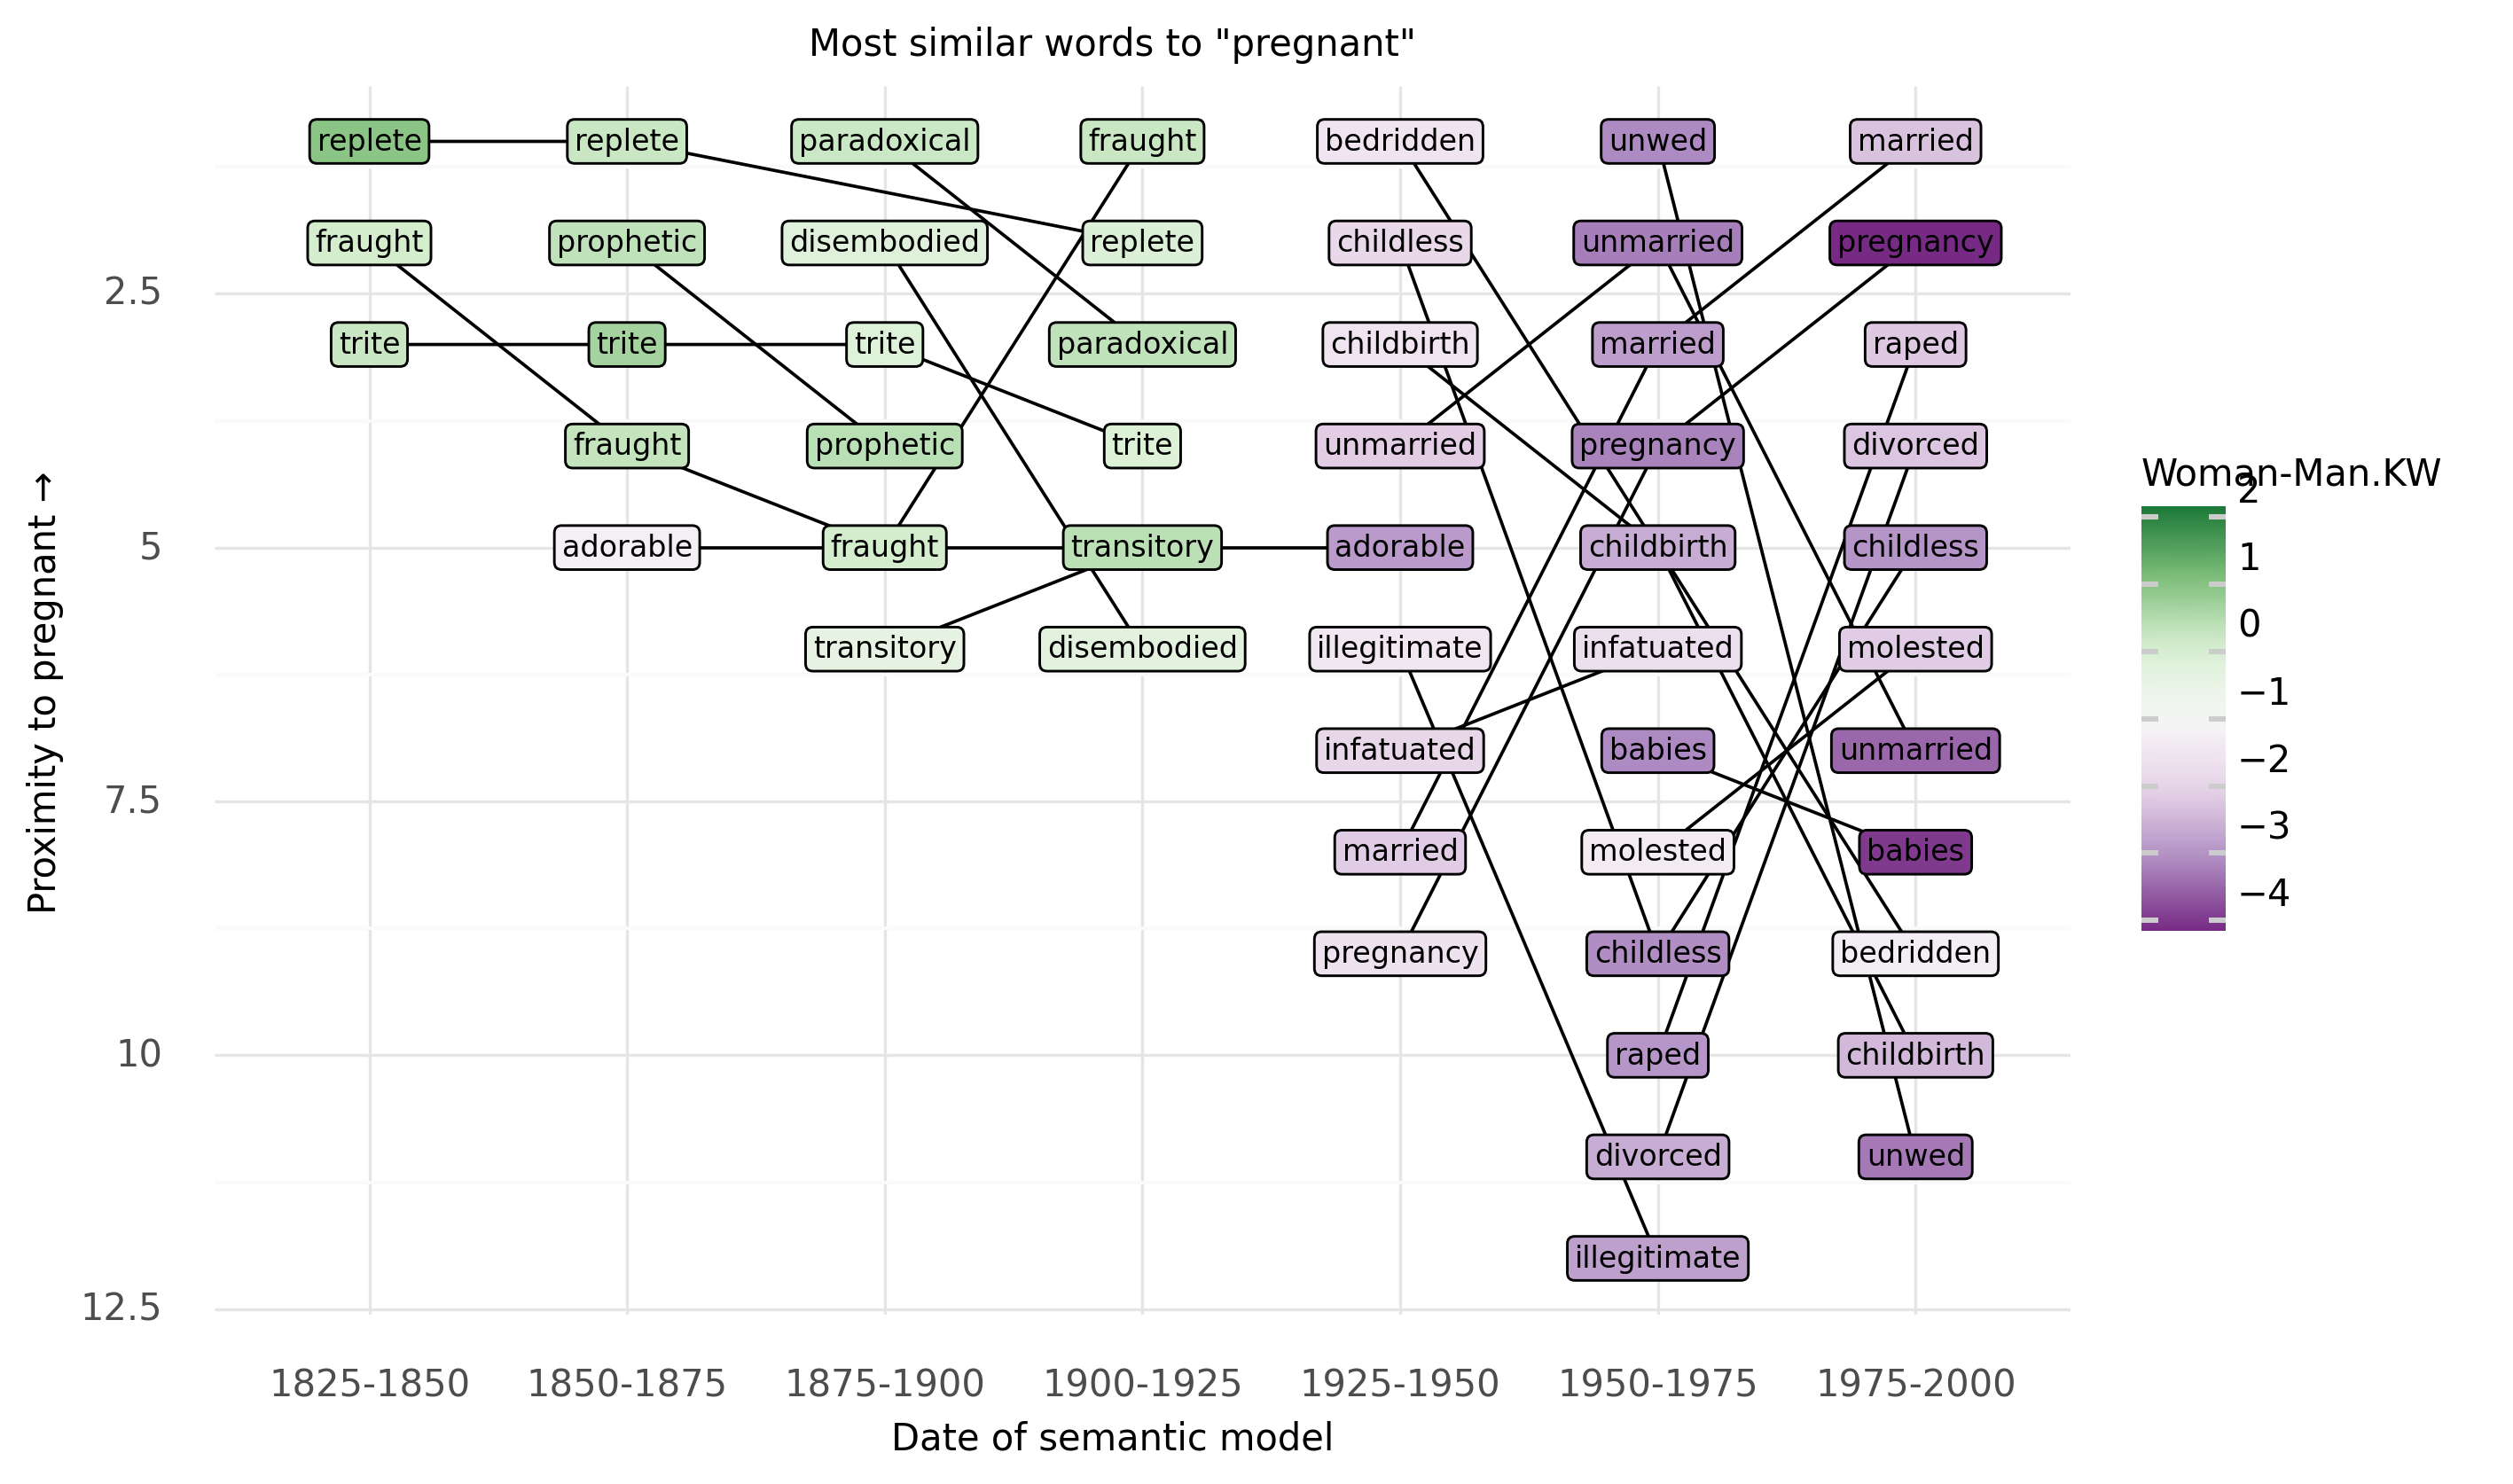

<ggplot: (672971409)>

In [102]:
plot_nbr('pregnant')

90it [00:01, 60.52it/s]


Number of unique neighbors: 28


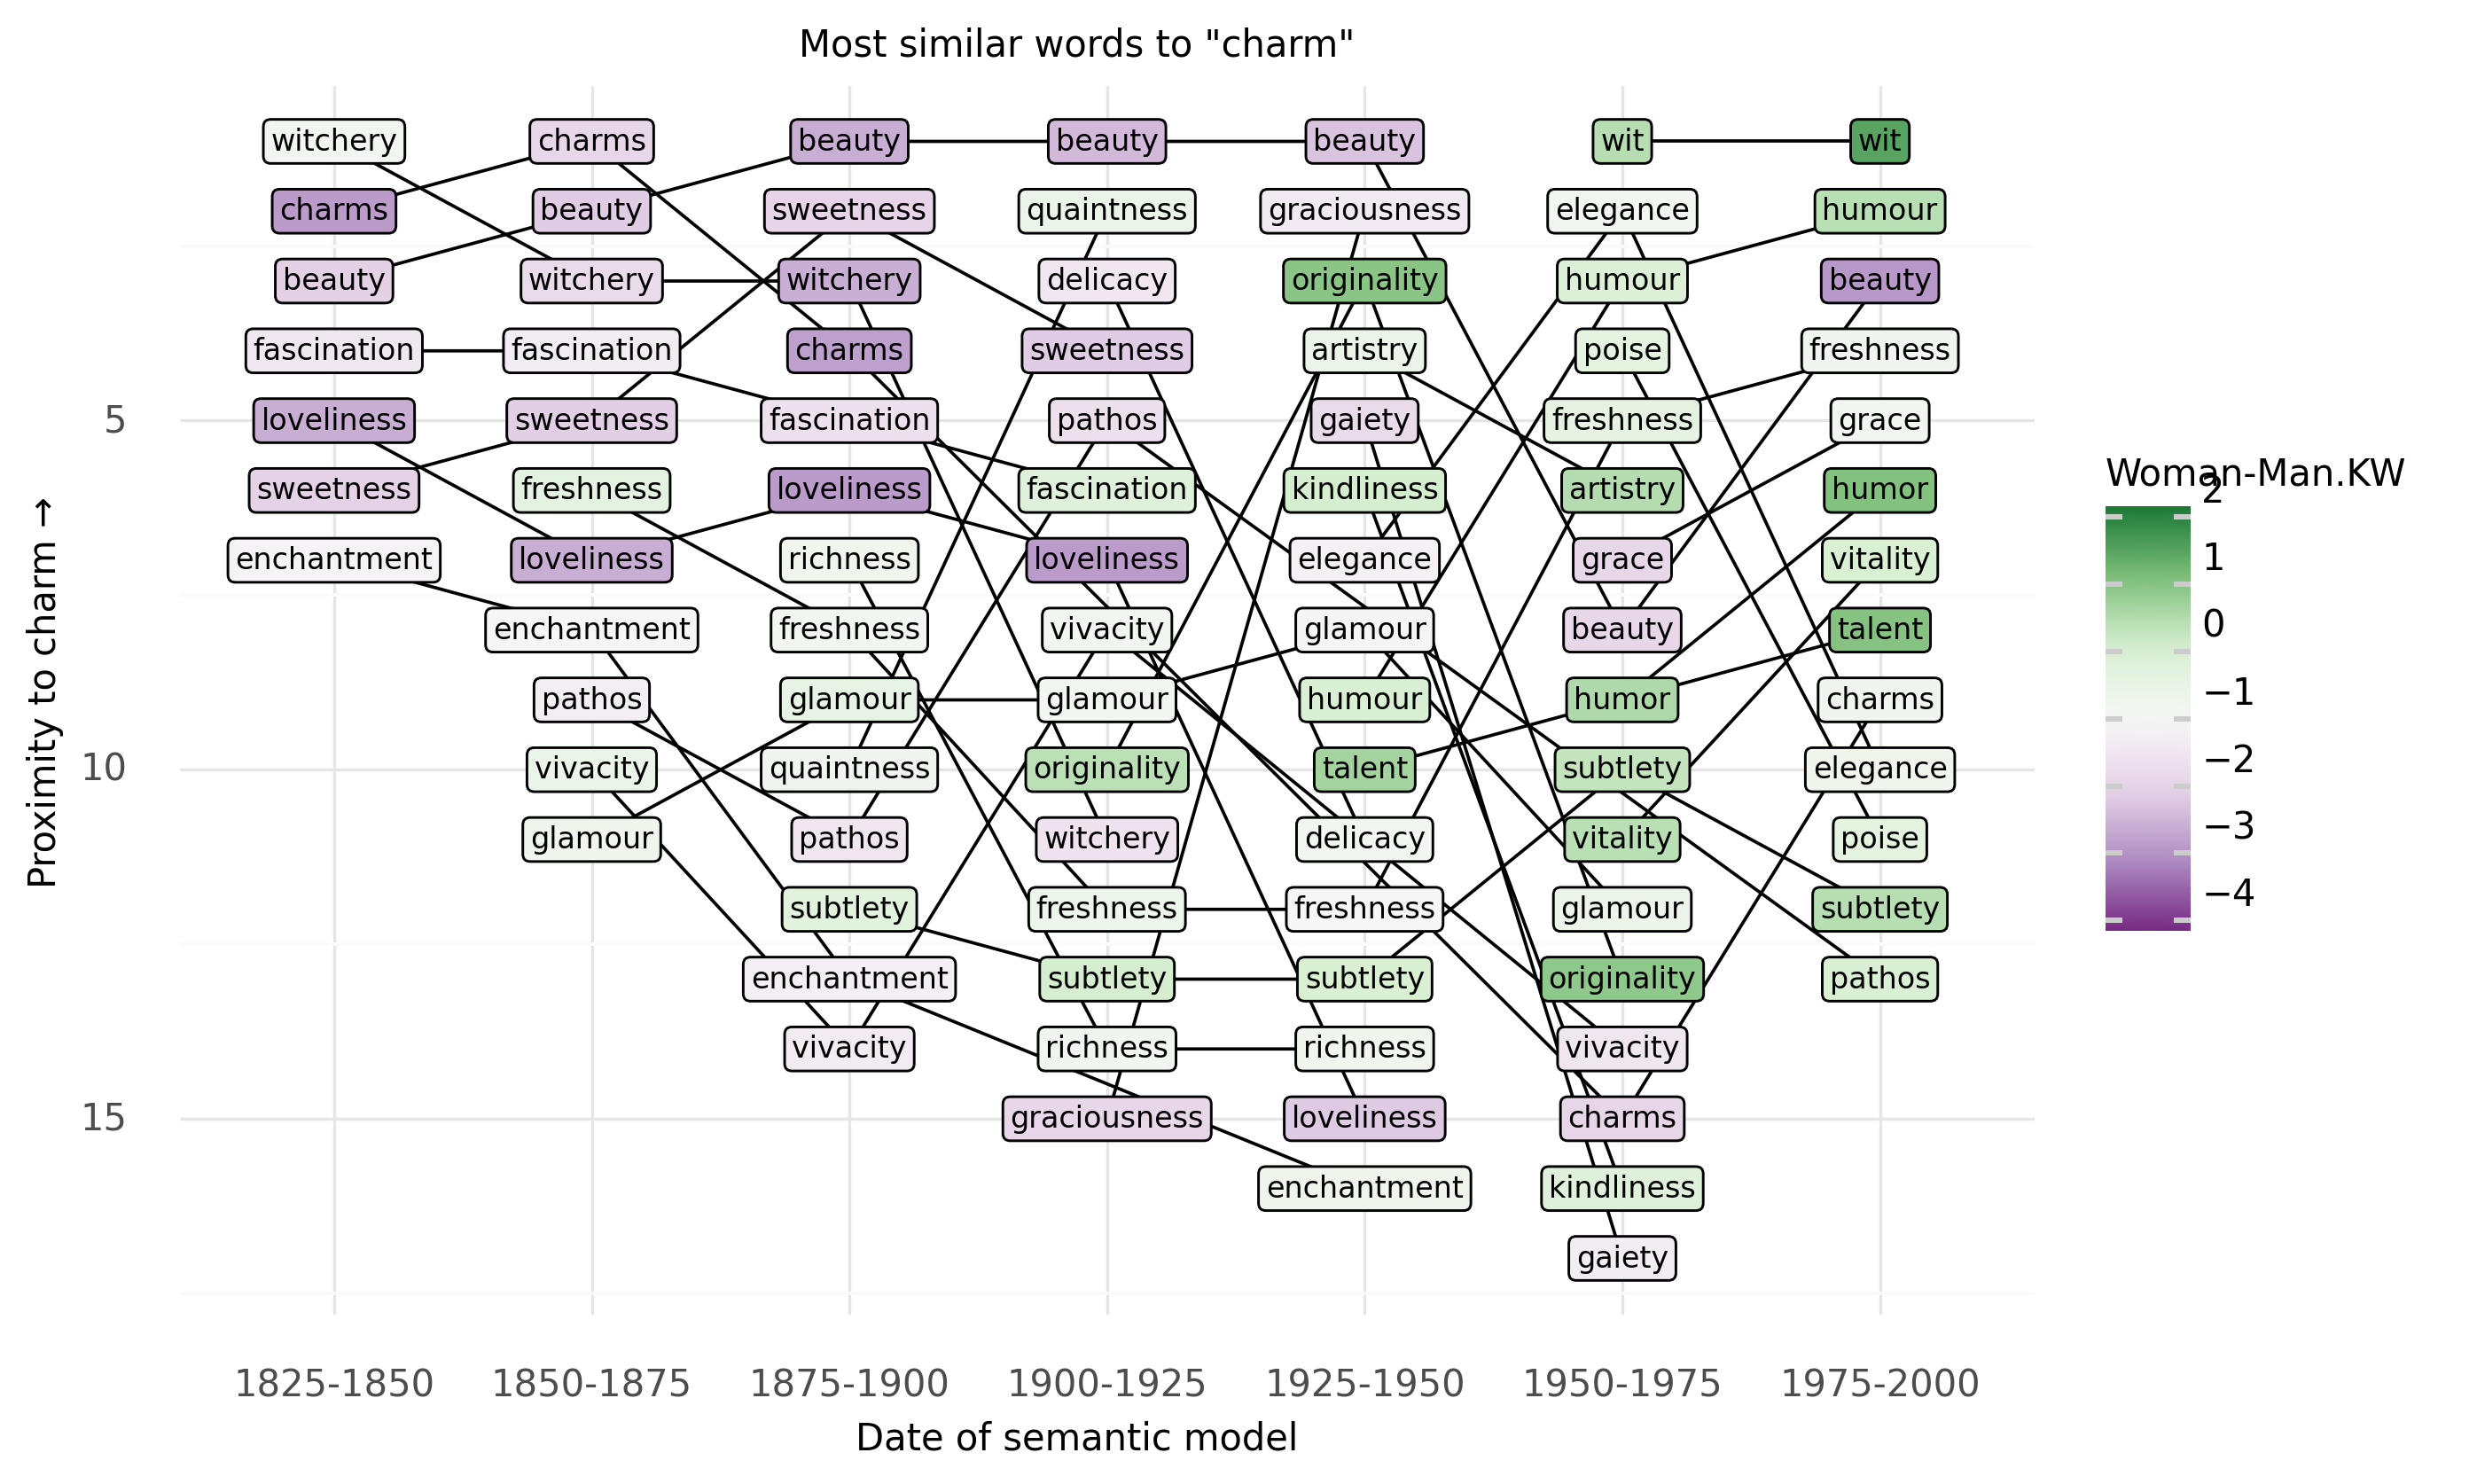

<ggplot: (698842146)>

In [103]:
plot_nbr('charm')

90it [00:01, 51.92it/s]


Number of unique neighbors: 21


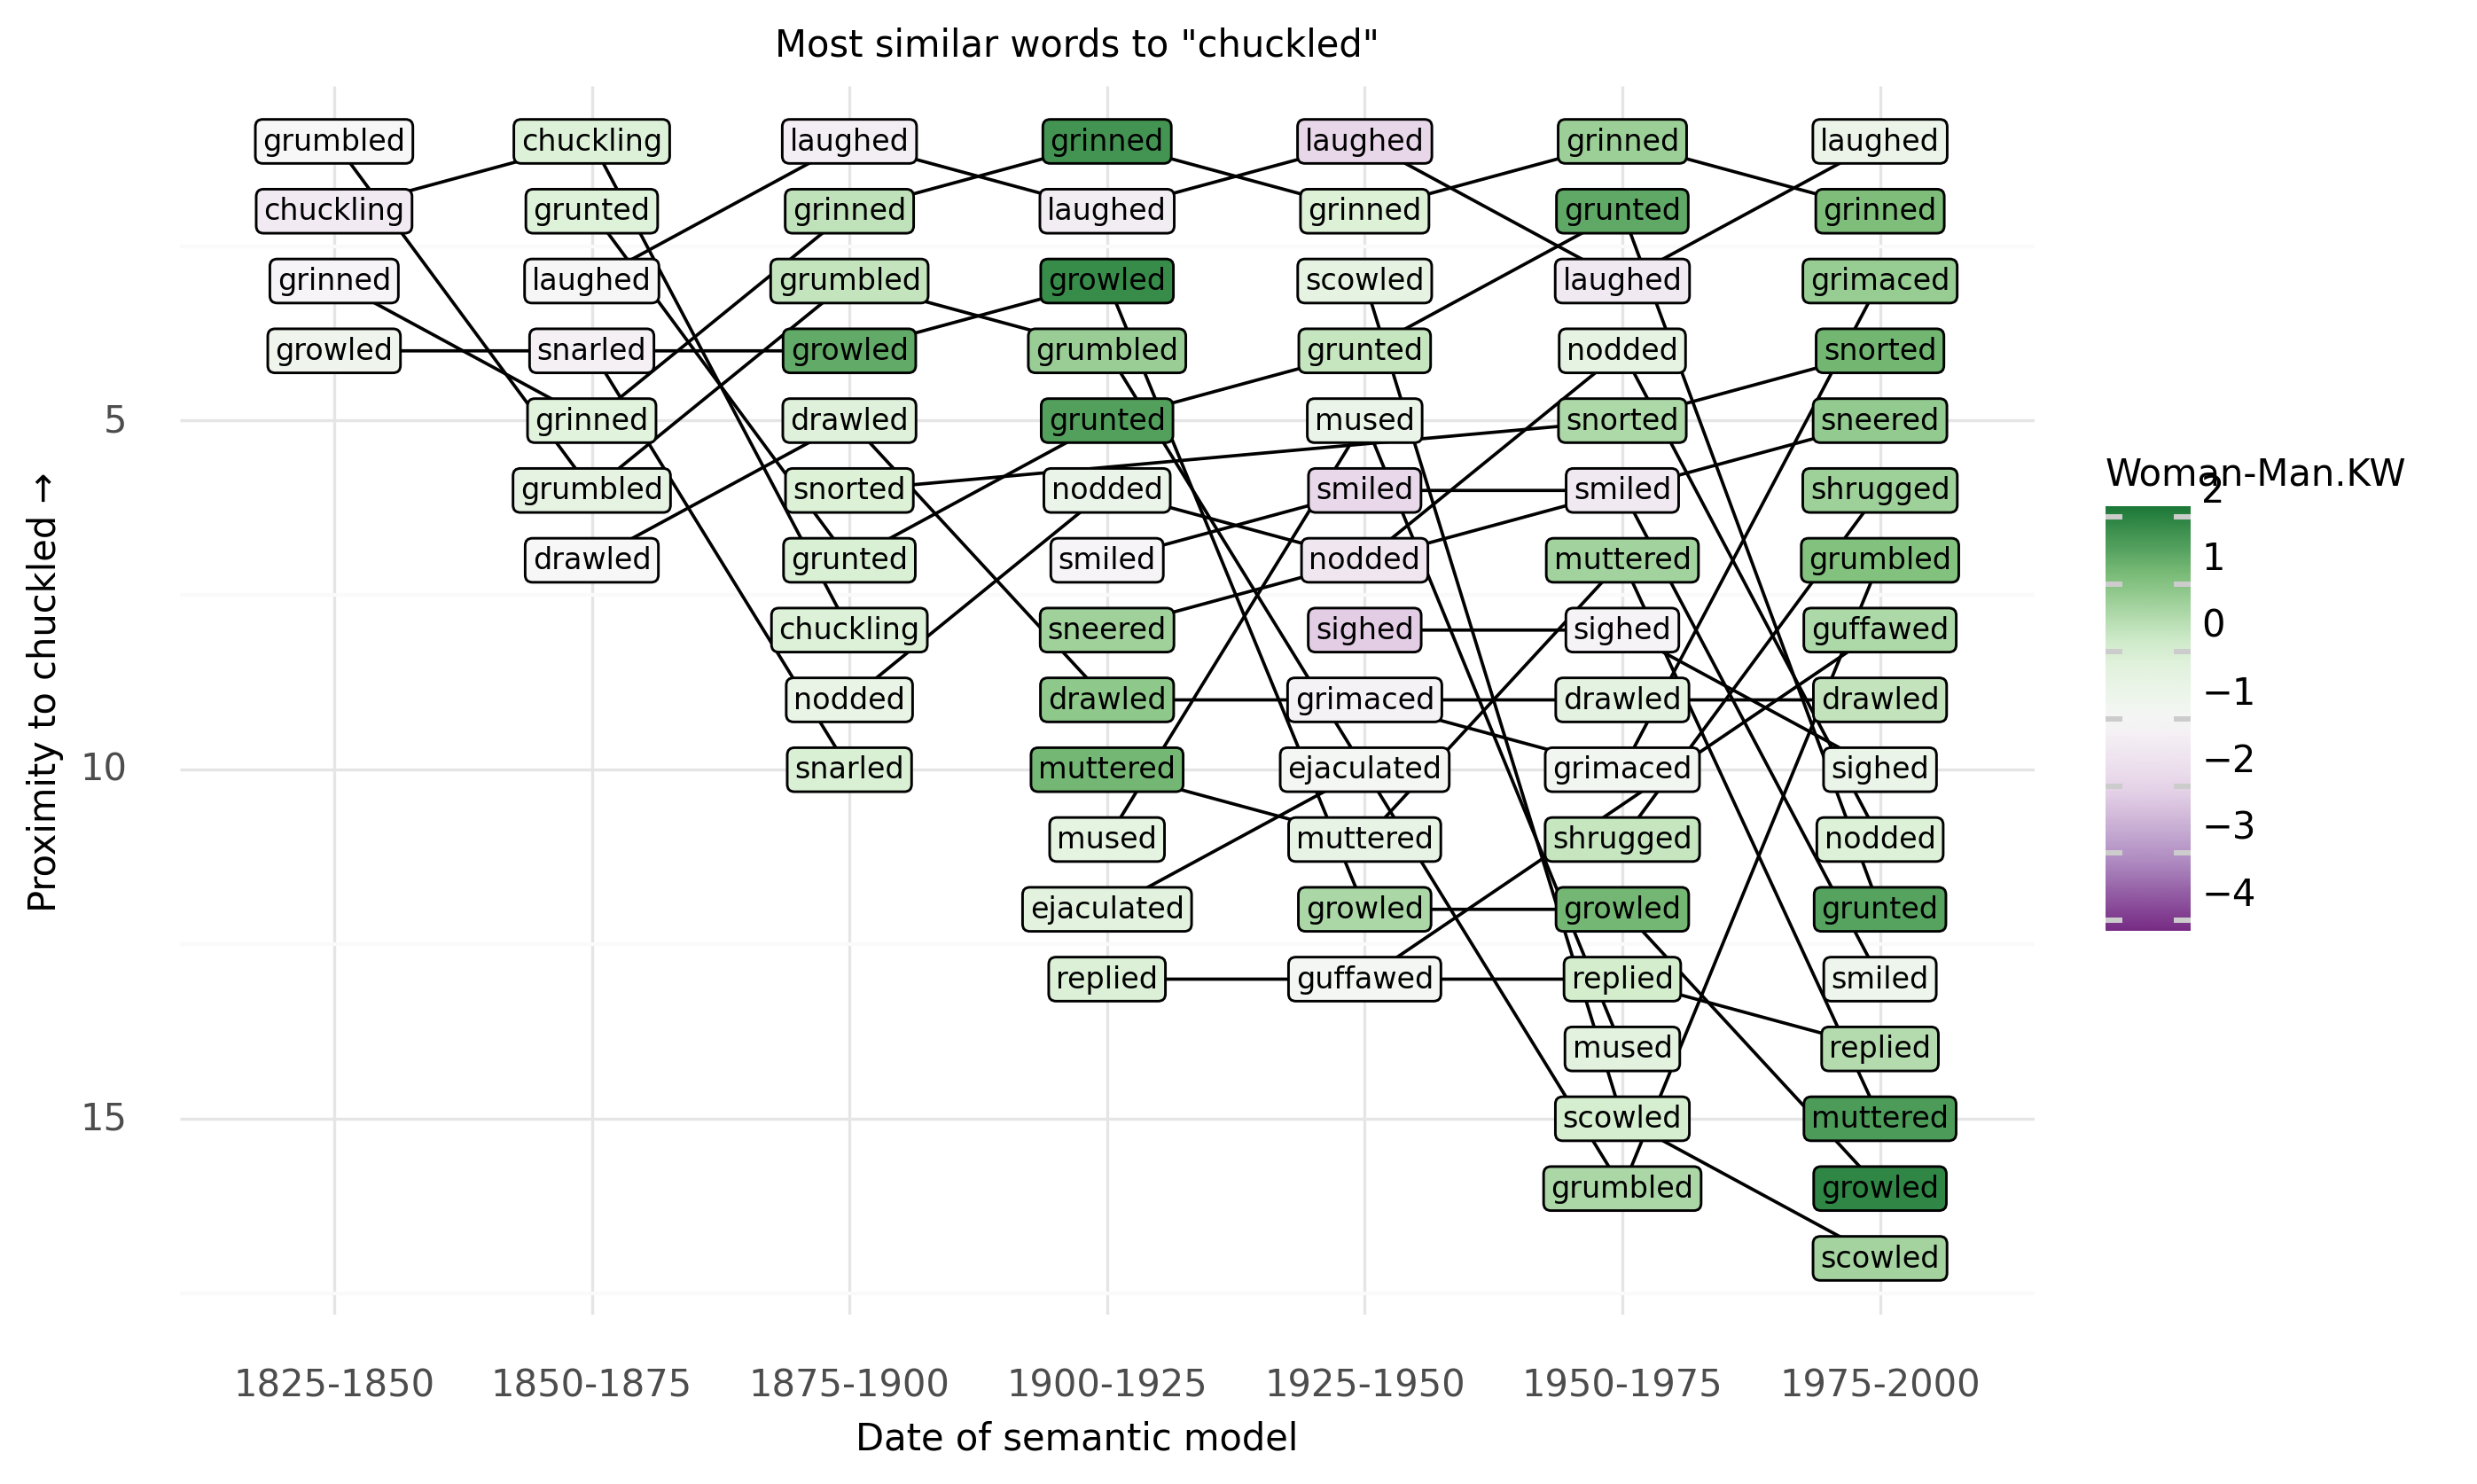

<ggplot: (682413153)>

In [104]:
plot_nbr('chuckled')

90it [00:01, 61.07it/s]


Number of unique neighbors: 36


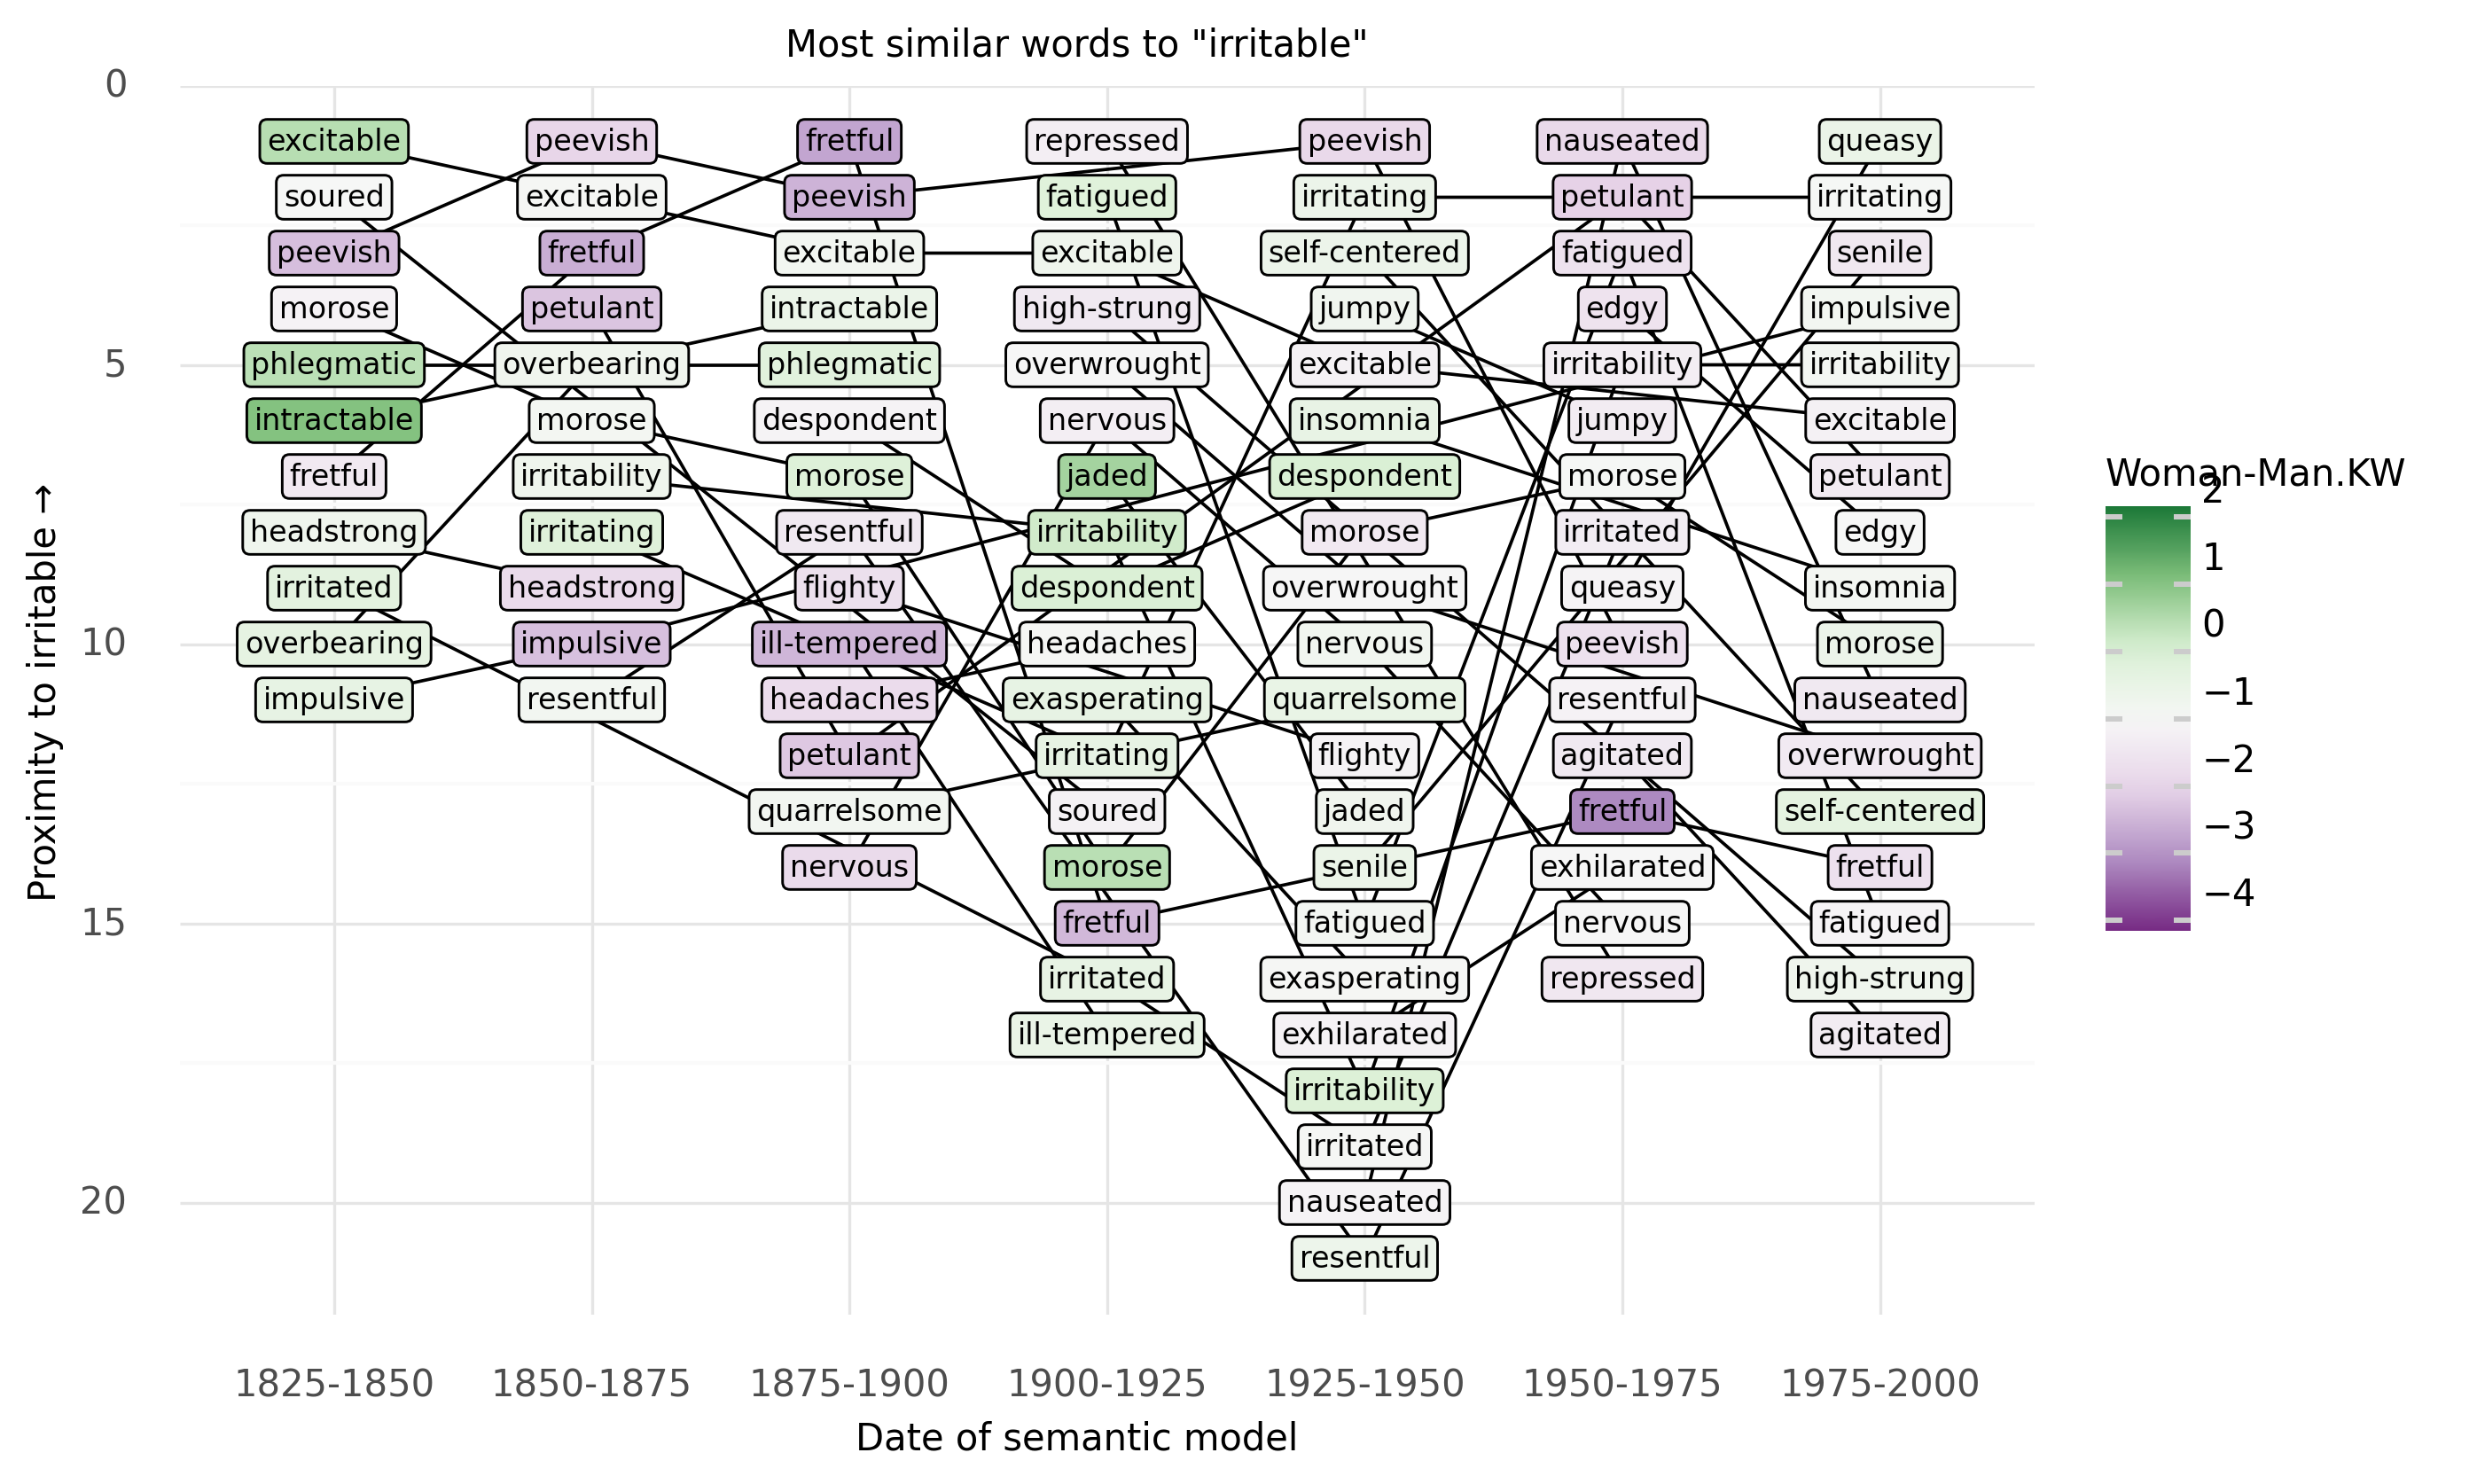

<ggplot: (677879426)>

In [105]:
plot_nbr('irritable')

90it [00:01, 52.68it/s]


Number of unique neighbors: 30


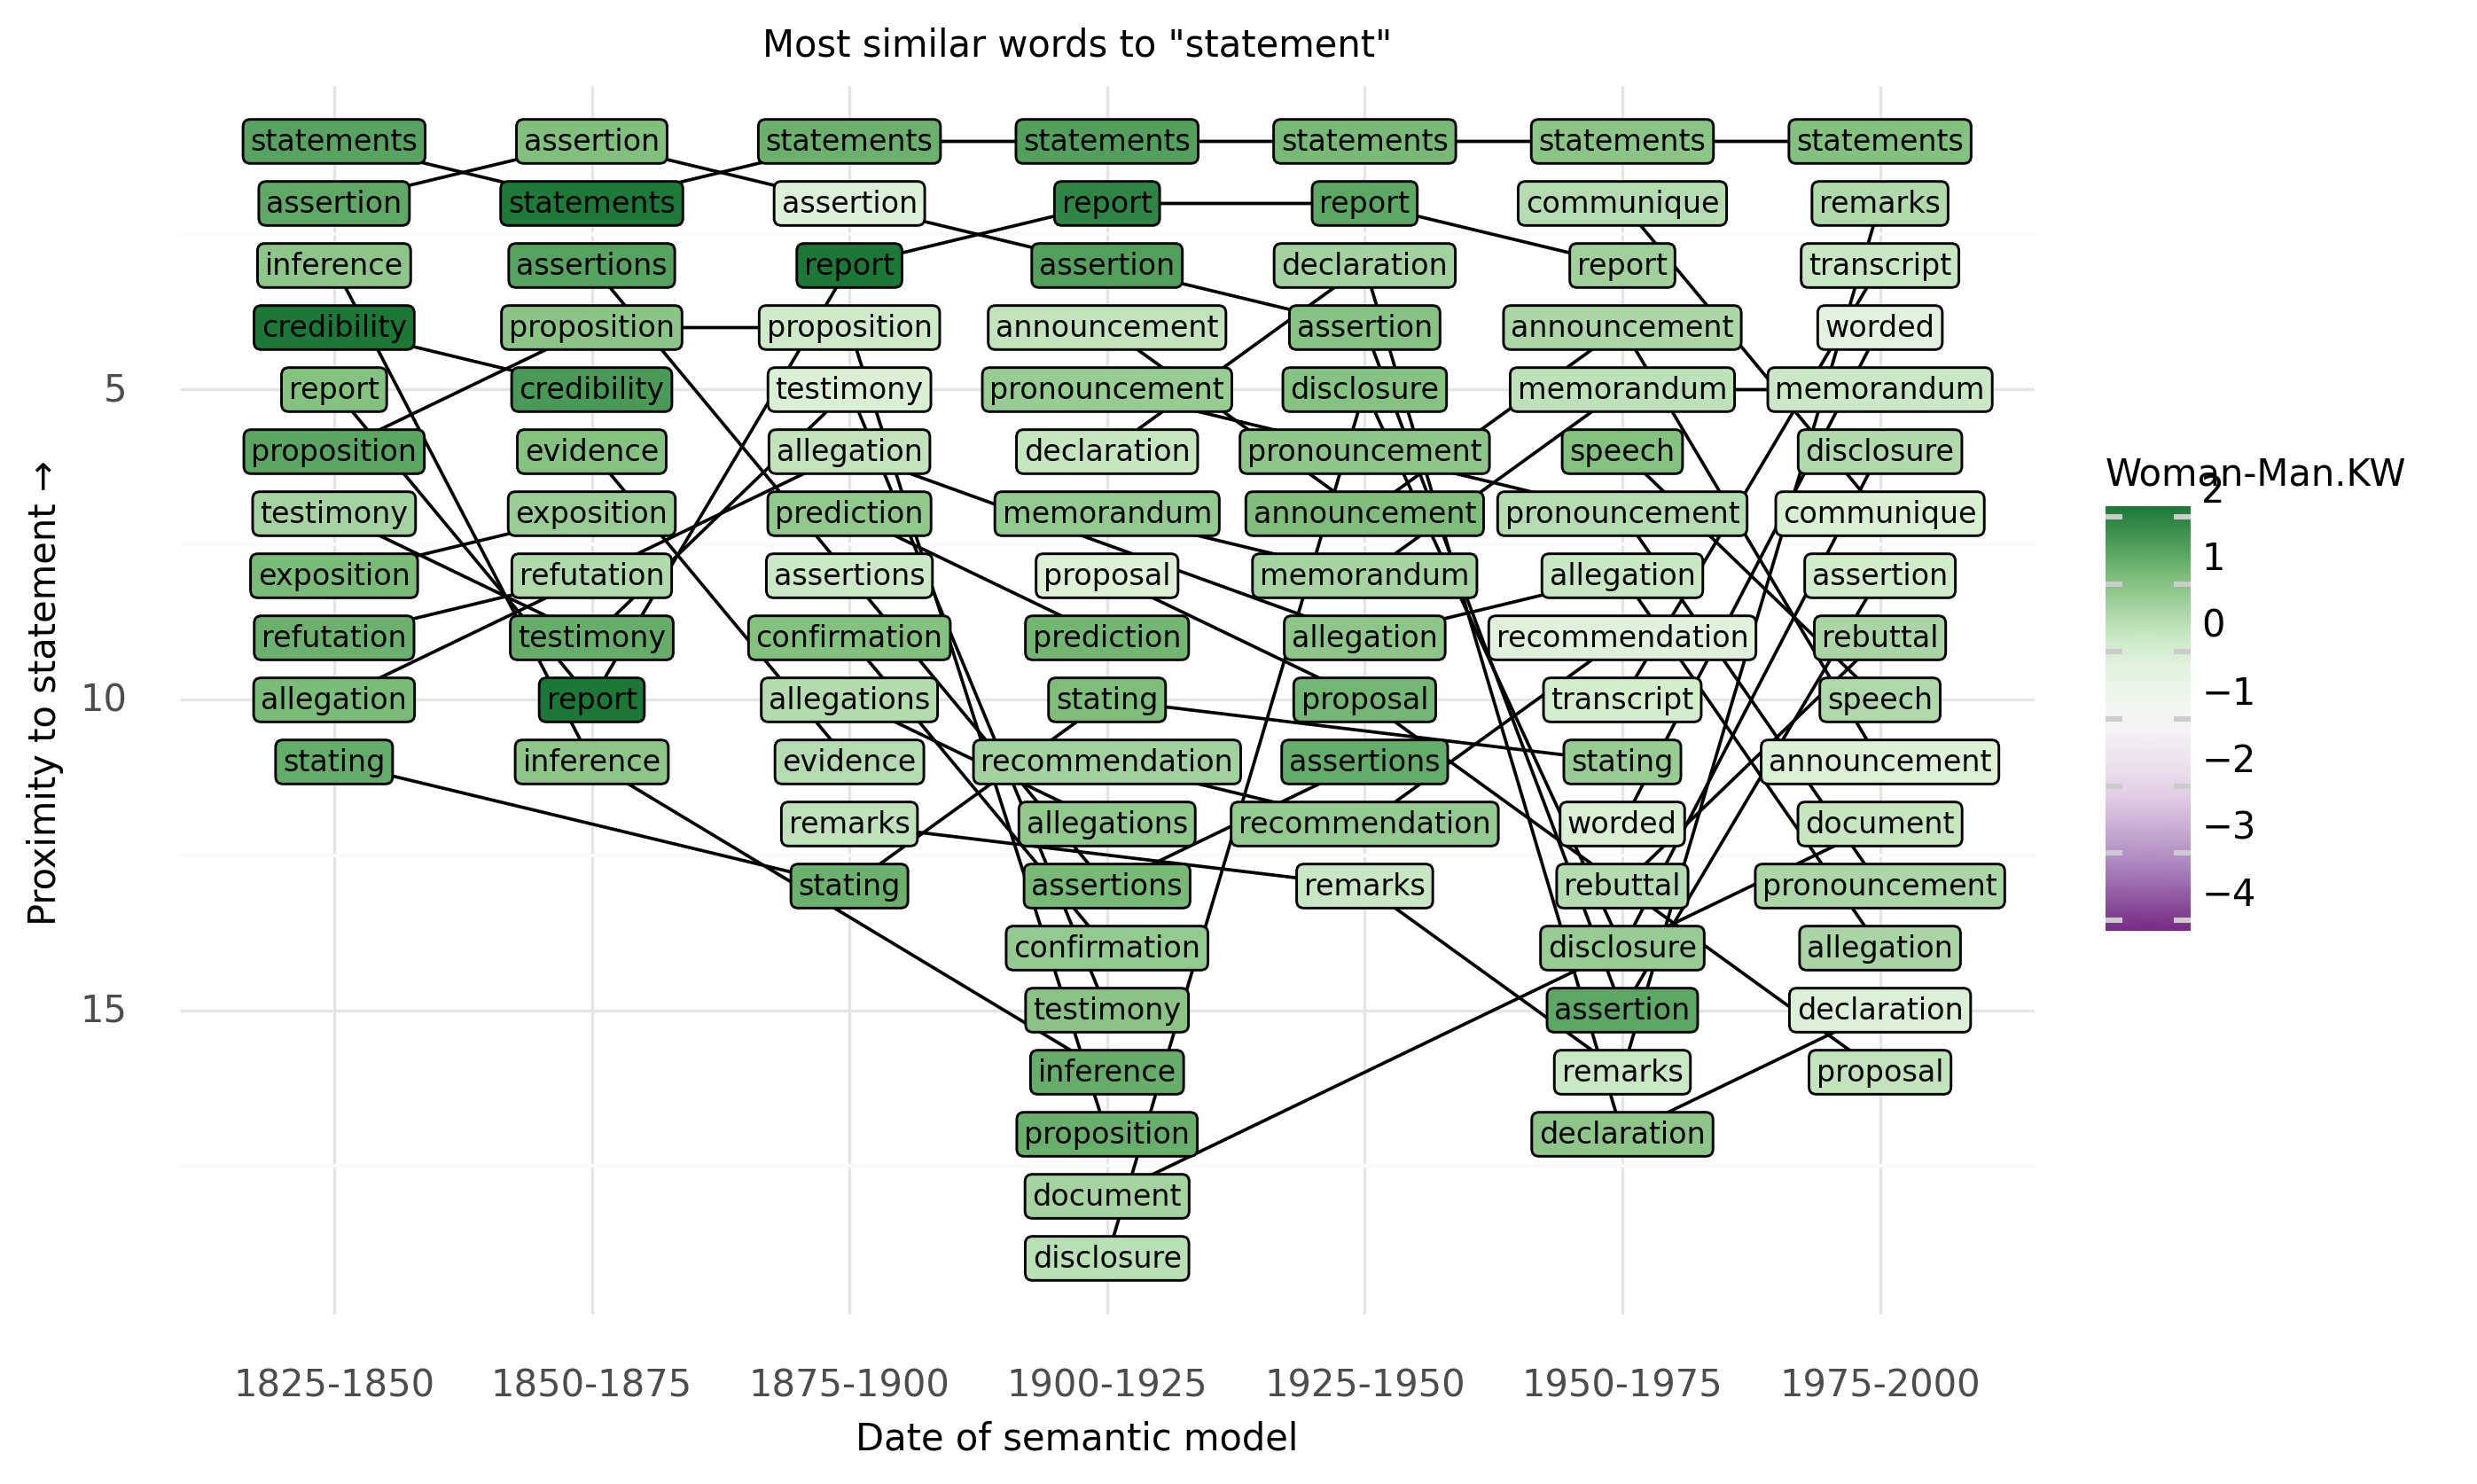

<ggplot: (673166032)>

In [112]:
plot_nbr('statement')

90it [00:01, 48.47it/s]


Number of unique neighbors: 36


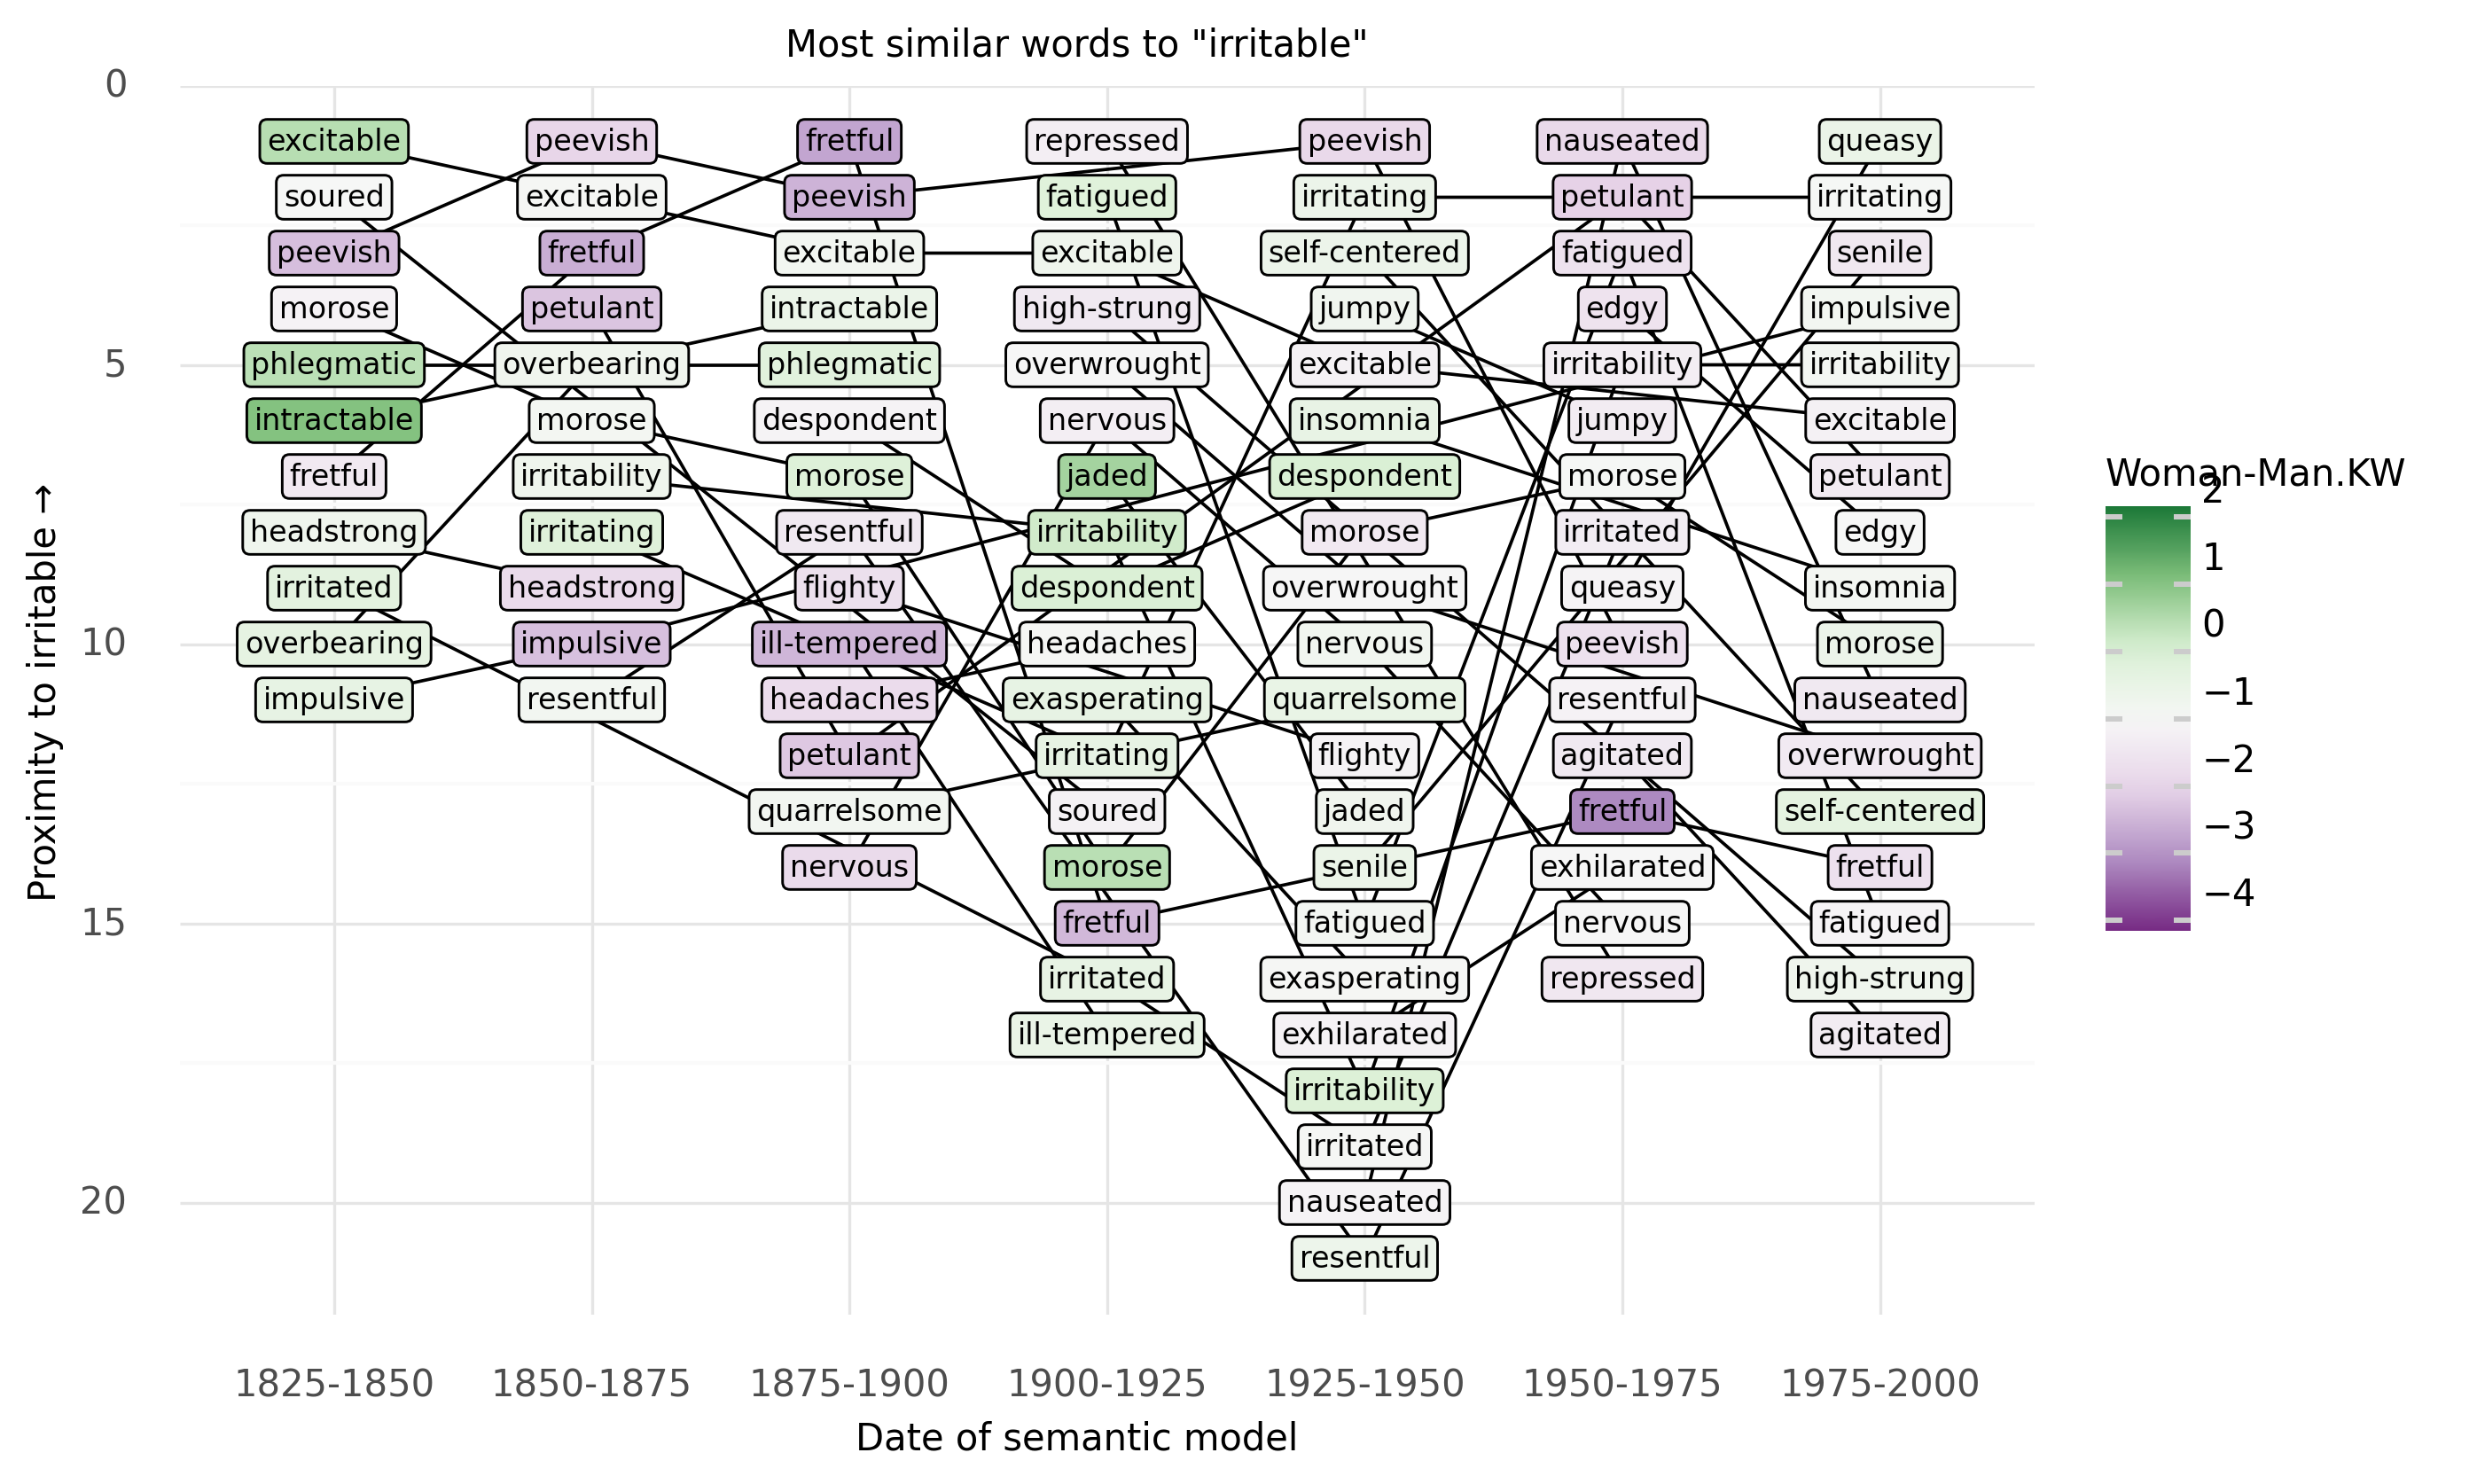

<ggplot: (674293194)>

In [108]:
plot_nbr('irritable')

90it [00:01, 56.69it/s]


Number of unique neighbors: 24


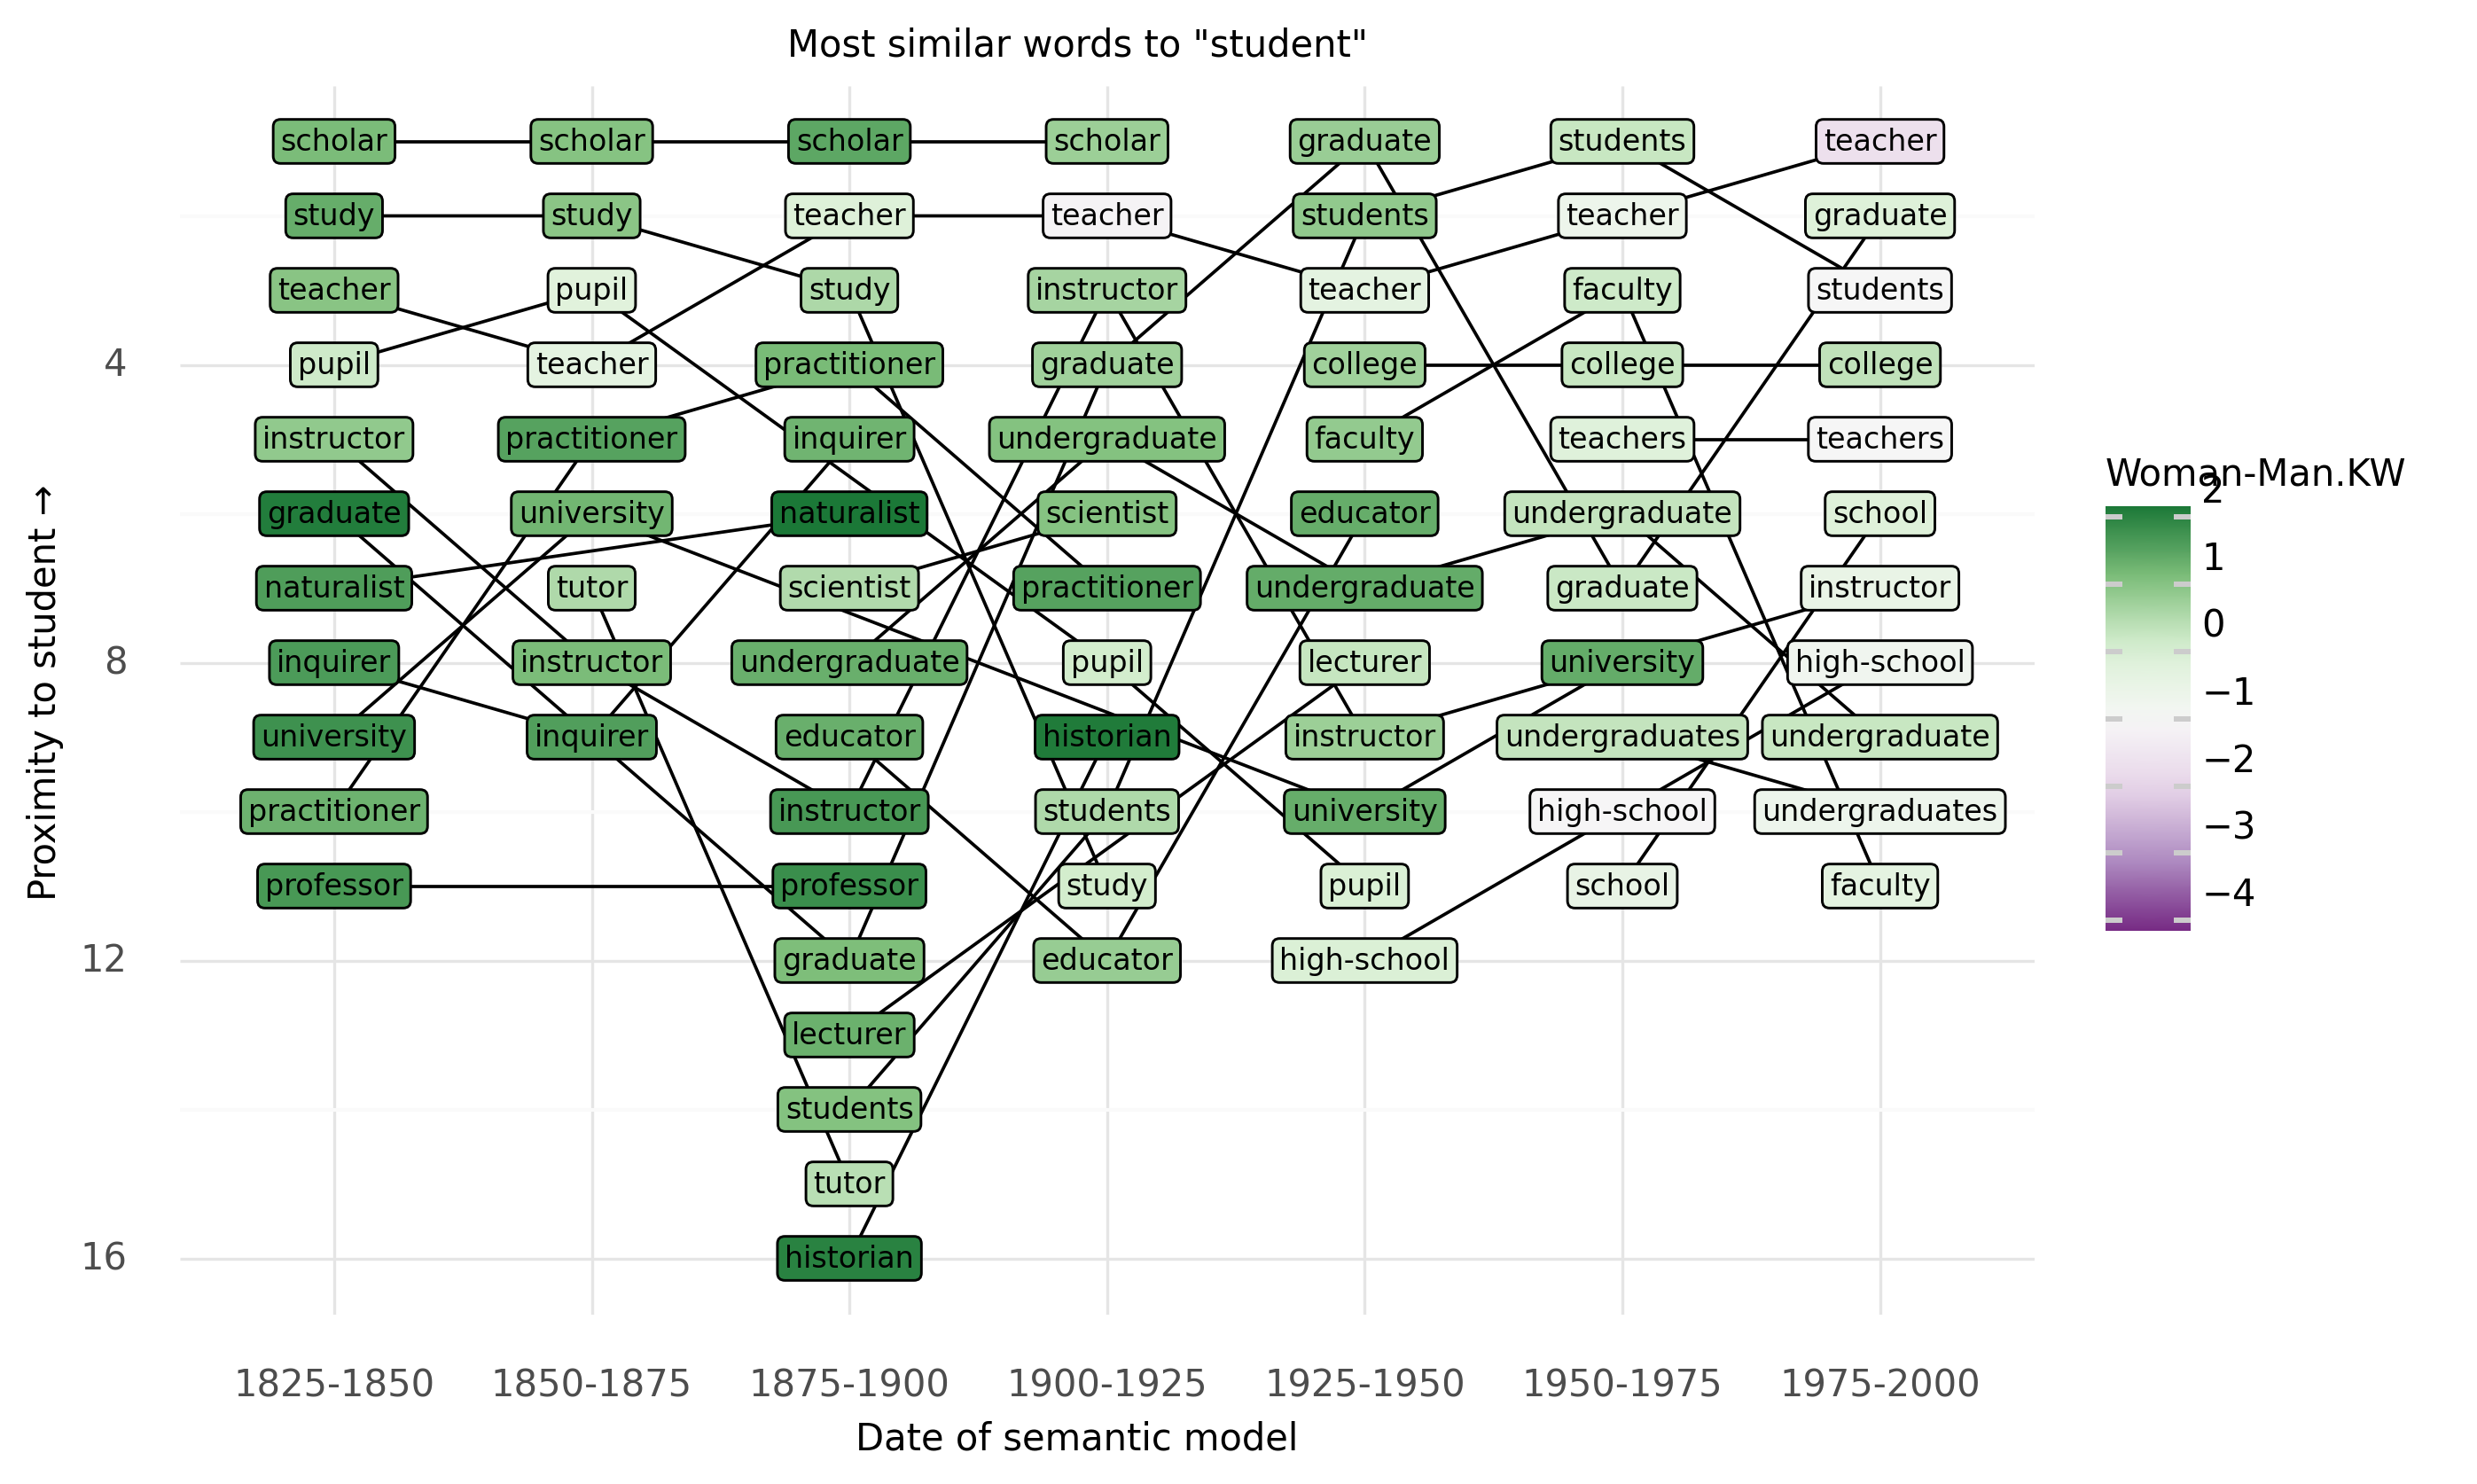

<ggplot: (698839489)>

In [109]:
plot_nbr('student')